# Analysis of Google Playstore Top 10 Applications 

Assuming the role of an app developer, we will be looking into the various features of an application in Google Playstore. The results should allow us to better understand how the success of an application can be influenced by the features and thus set the direction and nature of the application that we would like to develop. 

The dataset used in this analysis is obtained through Kaggle , contributed by author Gautham Prakash. (https://www.kaggle.com/gauthamp10/google-playstore-apps) 
The raw dataset consists of 24 columns and 2.3 million rows, obtained through web-scraping and accurate as of June 2021. 

There are many interesting columns that we can explore in the dataset, such as the App Size, Installs, Privacy Policy and App Price. However, for the purpose of this analysis, we will refer to mainly two columns as the metrics to measure an application's success - Rating and Installs/Minimum Installs. In this analysis, a successful application is defined to have high ratings (4.0 - 5.0) and high installation numbers( > 1 million installs). 

The goals to be addressed are:

**1. How do the features of an application affect its success?**
    
    a) What are the top app categories in the market?
    
    b) How do the ratings and install numbers differ between the application categories? 
    
    c) How does the application price influence the application rating and installation numbers? 
    
    d) How does the application size influence the application rating and installation numbers?
    
    e) What is the optimal minimal android system supported for an application to achieve high ratings and high installation numbers?
    
    f) Would a well-maintained application achieve higher ratings and installation numbers?
    
    g) What is the most popular content rating for successful applications? 
    
    h) Does having a privacy policy enhances the success of an application? 
    
    i) How does being listed as an Editor's Choice affect the success of an applications? 
    
    j) Are there applications with high installs and yet low ratings , translating to possible user disappointment?
    
 
**2. What is an optimal business model of a successful application?**
 
     a) Are successful applications usually free or paid ? 
     
     b) How do ad-supported applications and applications with in-app purchases differ in terms of ratings and installation numbers?
     


**The flow of this analysis is as follow:**
1. Basic data exploration and preparation
2. Data cleaning and data wrangling 
3. Univariate exploration 
4. Bi-variate and multi-variate exploration to address our goals 
5. Recommendation for App Development 


# 1. Basic Data Exploration

In [115]:
# import relevant libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Libraries to do plotly visualisation
import plotly
import plotly.graph_objects as px
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

In [2]:
# Import dataset 
df = pd.read_csv ('Dataset_(Yeo Siew Ping).csv')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
# Get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
#Getting to know the numerical columns in the data 
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [5]:
#Check for the rows and columns of the dataset 
df.shape

(2312944, 24)

In [6]:
#Getting the null values in our dataset 
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [7]:
# Calculate the percentage of null values in each column to gauge if it is appropriate to remove null values
print('% of null values for Rating:', ((df ['Rating'].isnull().sum())/len(df))*100)
print('% of null values for Released:',((df ['Released'].isnull().sum())/len(df))*100)
print('% of null values for Installs:',((df ['Installs'].isnull().sum())/len(df))*100)
print('% of null values for Privacy Policy:',((df ['Privacy Policy'].isnull().sum())/len(df))*100)
print('% of null values for Size:',((df ['Size'].isnull().sum())/len(df))*100)
print('% of null values for Minimum Android:',((df ['Minimum Android'].isnull().sum())/len(df))*100)

% of null values for Rating: 0.98934518086041
% of null values for Released: 3.0719723434722157
% of null values for Installs: 0.004626138808375819
% of null values for Privacy Policy: 18.19987859628249
% of null values for Size: 0.008474048658333275
% of null values for Minimum Android: 0.282324172137328


# 2. Data Cleaning and Wrangling

## **Deleting unwanted columns:**
1. App Id
2. Developer ID
3. Developer Website
4. Developer Email
5. Scrapped Time
6. Currency
7. Released
8. Maximum Installs 


In [8]:
#Drop unwanted columns for the analysis 
df.drop(['App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Scraped Time', 'Currency', 'Released', 'Maximum Installs'], axis = 1, inplace = True)

In [9]:
#Do a check to see if columns are removed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Free              bool   
 7   Price             float64
 8   Size              object 
 9   Minimum Android   object 
 10  Last Updated      object 
 11  Content Rating    object 
 12  Privacy Policy    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), object(8)
memory usage: 220.6+ MB


## **Check for duplicate values in our dataset**

In [10]:
#Check for any duplicates in the dataset
duplicate = df[df.duplicated()]
duplicate

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Size,Minimum Android,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
185370,呆萌鸟2,Casual,0.0,0.0,1+,1.0,True,0.0,13M,4.1 and up,"Dec 21, 2019",Everyone,http://www.zhongwei-info.com/yszc/main.html,False,False,False
235651,Funny Memes Stickers for WhatsApp - WAStickerApps,Communication,0.0,0.0,10+,10.0,True,0.0,27M,4.0.3 and up,"Jul 30, 2019",Mature 17+,NaN,True,False,False
452411,EXCEL CLASSES,Education,0.0,0.0,1+,1.0,True,0.0,37M,4.2 and up,"Jun 09, 2021",Everyone,https://classplusapp.com/privacy.html,False,False,False
488627,Funny Memes Stickers for WhatsApp - WAStickerApps,Communication,0.0,0.0,10+,10.0,True,0.0,27M,4.0.3 and up,"Jul 30, 2019",Mature 17+,NaN,True,False,False
566937,"Book, The Memoirs of General Philip H. Sherid...",Books & Reference,0.0,0.0,1+,1.0,True,0.0,6.8M,6.0 and up,"Apr 25, 2021",Teen,https://zeta-mars.blogspot.com/2018/11/blog-po...,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243833,"Book, The Works of Edgar Allan Poe",Books & Reference,0.0,0.0,10+,10.0,True,0.0,7.2M,6.0 and up,"Apr 23, 2021",Teen,https://zeta-mars.blogspot.com/2018/11/blog-po...,True,False,False
2286836,VZ | Exprésate Lector Unidad 2,Education,0.0,0.0,10+,10.0,True,0.0,54M,5.0 and up,"Apr 15, 2019",Everyone,http://www.educar.com.co/index.php/politica_de...,False,False,False
2293112,Funny Memes Stickers for WhatsApp - WAStickerApps,Communication,0.0,0.0,10+,10.0,True,0.0,27M,4.0.3 and up,"Jul 29, 2019",Mature 17+,NaN,True,False,False
2295473,Funny Memes Stickers for WhatsApp - WAStickerApps,Communication,0.0,0.0,10+,10.0,True,0.0,27M,4.0.3 and up,"Jul 31, 2019",Mature 17+,NaN,True,False,False


Attempted to sieve duplicates values based on a single column - App name , but later realised that there are many duplicates based on App name alone. 

Although the App name is a duplicate, the other columns are different. Therefore, I did a quick check on google playstore and realised that there are indeed multiple apps having the same app name.

In [11]:
#Drop all duplicates and keep the first entry for each duplicate 
df.drop_duplicates(keep = 'first', inplace = True)

# Check if duplicates successfully dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312877 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Free              bool   
 7   Price             float64
 8   Size              object 
 9   Minimum Android   object 
 10  Last Updated      object 
 11  Content Rating    object 
 12  Privacy Policy    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), object(8)
memory usage: 238.2+ MB


## **Ensure Datatypes are correct for all columns** 

The columns are not in right datatypes:
1. Size
2. Last Updated

* To note: Installs column will be kept as an object as it serves as a standard labeling for applications in Google Playstore. Installs and Minimum Installs contain the same info, but Minimum Installs has datatype of float64 instead of object. For the purpose of this analysis, we will use install numbers from the Minimum Installs as a gauge

**1. Size** 

- Column has 'Varies with device' inputs which make up a total of 74777 rows (3% of the entire dataset). As I will need this column in a numerical datatype, I will convert all under 'Varies with device' to 0.

- As the size is in different forms such as MB, GB and KB, I will standardise all to MB and change the datatype to float. 

In [12]:
df['Size'].value_counts()

Varies with device    74777
11M                   62156
12M                   56079
13M                   48031
14M                   45210
                      ...  
8.7k                      1
784M                      1
385M                      1
7.6k                      1
512M                      1
Name: Size, Length: 1657, dtype: int64

In [13]:
# Calculate the percentage of Varies with device in the Size column
print( '% of Varies with Device:', (len(df[df['Size'] == 'Varies with device'])/len(df))*100)

% of Varies with Device: 3.233072921733408


In [14]:
#Create a function to standardise all size to MB and change all to float64 
#For 'Varies with device', they will be converted to 0

def size_converter(data):
        
    data=data.replace(',','')                # Replace all commas with spaces
    num=data[:-1]                            # preserve the numericals as num 
    if data[-1]=='K' or data[-1]=='k' :      # Remove k and convert KB to MB and to float
        return float(num)/1000
    elif data[-1]=='M' or data[-1]=='m':     # Remove m and convert to float
        return float(num)
    elif data[-1]=='G' or data[-1]=='g':     # Remove g and convert all GB to MB and to float
        return float(num)*1000
    else:
        return (0)                           # Otherwise convert it to 0 

In [15]:
#Apply the function 
df['Size'] = df['Size'].astype(str).apply(size_converter)

In [16]:
#Check if datatype has been changed 
df['Size'].dtype

dtype('float64')

**2. Last Updated** 

- Column to be changed to datetime format. This is to allow data wrangling of date columns later on. 

In [17]:
#Convert Last Updated column to datetime format 
df['Last Updated']= pd.to_datetime(df['Last Updated'])
df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Size,Minimum Android,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,True,0.0,10.0,7.1 and up,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,True,0.0,2.9,5.0 and up,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,True,0.0,3.7,4.0.3 and up,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,True,0.0,1.8,4.0.3 and up,2018-10-13,Everyone,NaN,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,True,0.0,6.2,4.1 and up,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312877 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          object        
 5   Minimum Installs  float64       
 6   Free              bool          
 7   Price             float64       
 8   Size              float64       
 9   Minimum Android   object        
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Privacy Policy    object        
 13  Ad Supported      bool          
 14  In App Purchases  bool          
 15  Editors Choice    bool          
dtypes: bool(4), datetime64[ns](1), float64(5), object(6)
memory usage: 238.2+ MB


## **Ensure that the columns are in the right format for this analysis**
1. Minimum Android
2. Privacy Policy




**1. Minimum Android**

- Column consists of 'Varies with device', these values take up a marginal proportion of the dataset (2%). 
- Therefore, I will proceed to change 'Varies to device' to 'NA' first and delete them later. 
- Since it is the minimal android supported, I will only take the first value of the string for this analysis. 

In [19]:
# Get the percentage of 'Varies with device' in the dataset
(len(df.loc [df ['Minimum Android']== 'Varies with device', 'Minimum Android'])/len(df))*100

1.998117496088205

In [20]:
#Converting all 'Varies with device' to nan values first 
df.loc[df ['Minimum Android']== 'Varies with device', 'Minimum Android'] = np.nan

In [21]:
#Check for unique values 
df['Minimum Android'].unique()

array(['7.1 and up', '5.0 and up', '4.0.3 and up', '4.1 and up',
       '6.0 and up', '4.4 and up', '4.0 and up', '4.2 and up',
       '2.1 and up', '7.0 and up', '2.2 and up', '2.3 and up',
       '4.3 and up', '5.1 and up', nan, '1.6 and up', '3.0 and up',
       '8.0 and up', '2.3.3 and up', '4.4W and up', '3.2 and up',
       '1.5 and up', '4.0.3 - 7.1.1', '3.1 and up', '2.0 and up',
       '1.0 and up', '1.1 and up', '2.0.1 and up', '4.4 - 6.0',
       '2.1 - 4.4', '4.0 - 5.0', '2.0 - 2.3.4', '2.2 - 4.4', '4.1 - 7.0',
       '4.1 - 6.0', '4.0 - 4.4W', '4.0 - 4.4', '4.0.3 - 7.0', '2.3 - 5.0',
       '4.0 - 7.1.1', '4.1 - 7.1.1', '4.0 - 7.0', '4.1 - 8.0',
       '4.0 - 6.0', '2.3 - 7.0', '4.0 - 8.0', '2.3 - 6.0', '2.1 - 2.3.4',
       '3.0 - 4.1.1', '2.2 - 3.0', '2.0 - 8.0', '4.0.3 - 8.0',
       '3.0 - 4.4W', '4.4 - 7.1.1', '4.4 - 8.0', '4.0.3 - 6.0',
       '1.6 - 4.0.4', '8.0', '2.3 - 5.1', '2.1 - 7.1.1', '2.3 - 4.4W',
       '4.4 - 7.0', '6.0 - 7.1.1', '2.3 - 4.4', '2.2 - 4.0.4'

In [22]:
# Split the string by double spaces and get the first value of the string as teh minimum android system required
df2 = df['Minimum Android'].str.split(' ', expand = True)
df2[0]

0            7.1
1            5.0
2          4.0.3
3          4.0.3
4            4.1
           ...  
2312939      4.1
2312940      4.1
2312941      5.0
2312942      5.0
2312943      5.0
Name: 0, Length: 2312877, dtype: object

In [23]:
#Assign the first value back to the column 'Minimum Android'
df['Minimum Android'] = df2[0]

In [24]:
# Check for unqiue values of minimum android to make sure format is successfully converted 
df['Minimum Android'].unique()

array(['7.1', '5.0', '4.0.3', '4.1', '6.0', '4.4', '4.0', '4.2', '2.1',
       '7.0', '2.2', '2.3', '4.3', '5.1', nan, '1.6', '3.0', '8.0',
       '2.3.3', '4.4W', '3.2', '1.5', '3.1', '2.0', '1.0', '1.1', '2.0.1'],
      dtype=object)

**2. Privacy Policy** 

- The null values took up 18% of the dataset. As this column would be an interesting one to explore in the analysis, I will proceed to keep the null values of this column and convert the null values to False (No Privacy Policy). 

- Those with inputs will be converted to 'True' (Privacy policy is included for the app)




In [25]:
# Convert the non-null values of Privacy Policy to TRUE and null values with FALSE
df.loc[df['Privacy Policy'].notnull(), 'Privacy Policy'] = 'True'
df['Privacy Policy'].fillna('False', inplace=True)
df['Privacy Policy'].unique()

array(['True', 'False'], dtype=object)

In [26]:
# Checking the value counts of privacy policy to make sure that the conversion is successful
df['Privacy Policy'].value_counts()

True     1891952
False     420925
Name: Privacy Policy, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312877 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          object        
 5   Minimum Installs  float64       
 6   Free              bool          
 7   Price             float64       
 8   Size              float64       
 9   Minimum Android   object        
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Privacy Policy    object        
 13  Ad Supported      bool          
 14  In App Purchases  bool          
 15  Editors Choice    bool          
dtypes: bool(4), datetime64[ns](1), float64(5), object(6)
memory usage: 238.2+ MB


## **Clean up columns with repeated info**

1. Category
2. Content Ratings

**1. Category**

- Column has repetitive categories - (Music & Audio, Music) and ( Educational , Education)
- I will proceed to combine them into a single category

In [28]:
#Check for value counts in Category to see if there are any repetitive categories 
df['Category'].value_counts()

Education                  241078
Music & Audio              154899
Tools                      143983
Business                   143769
Entertainment              138273
Lifestyle                  118331
Books & Reference          116723
Personalization             89207
Health & Fitness            83508
Productivity                79697
Shopping                    75255
Food & Drink                73925
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51167
Casual                      50812
Communication               48151
Sports                      47483
Social                      44733
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26721
Simulation                  23282
Adventure                   23203
Educational                 21307
Art & Design                18539
Auto & Vehicle

In [29]:
#Combine the repetitive categories into one by renaming them
df['Category'] = df['Category'].str.replace('Music & Audio', 'Music')
df['Category'] = df['Category'].str.replace('Educational', 'Education')

**2. Content Rating** 

- Convert 'Unrated' to 'Everyone' 

In [30]:
#Check for unique values in Content Rating
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Mature 17+' 'Everyone 10+' 'Adults only 18+' 'Unrated']


In [31]:
# Convert 'Unrated' to 'Everyone' and check for unique values to see if conversion is successful
df['Content Rating'] = df['Content Rating'].replace('Unrated', 'Everyone')
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+'], dtype=object)

## **Remove null values in the dataset**

- As the proportion of the rest of the null values are marginal, I will proceed to remove the null values 

In [32]:
#Check for remaining null values
df.isnull().sum()

App Name                2
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Free                    0
Price                   0
Size                    0
Minimum Android     52744
Last Updated            0
Content Rating          0
Privacy Policy          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [33]:
# Remove the null values from dataset and do a check again
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Free                0
Price               0
Size                0
Minimum Android     0
Last Updated        0
Content Rating      0
Privacy Policy      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

Now we are ready to start the analysis by doing univariate exploration. 

# 3. Univariate Exploration

In this section, the numerical and categorical variables will be explored. Due to the large size of this dataset, the variance might be huge and there might be multiple outliers. The outliers have to be treated with caution as they reflect the reality of the market. 

## Numerical Variables

In [34]:
# Take a look at the statistics for the numerical columns 
df.describe()

,Rating,Rating Count,Minimum Installs,Price,Size
count,2.259143e+06,2.259143e+06,2.259143e+06,2.259143e+06,2.259143e+06
mean,2.193636e+00,2.206859e+03,1.183403e+05,1.018984e-01,1.891969e+01
std,2.107385e+00,1.097612e+05,4.031600e+06,2.644085e+00,2.392139e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00,4.800000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,0.000000e+00,1.000000e+01
75%,4.300000e+00,4.100000e+01,5.000000e+03,0.000000e+00,2.400000e+01
max,5.000000e+00,8.917710e+07,1.000000e+09,4.000000e+02,1.500000e+03


In [35]:
# Get a sensing of how the variables correlates with each other 
df.corr()

,Rating,Rating Count,Minimum Installs,Free,Price,Size,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.020034,0.027265,-0.008039,-0.004305,0.050765,0.161139,0.152755,0.018545
Rating Count,0.020034,1.000000,0.461050,0.001922,-0.000564,0.031336,0.008856,0.041887,0.168838
Minimum Installs,0.027265,0.461050,1.000000,0.003796,-0.001079,0.028965,0.013220,0.045777,0.102464
Free,-0.008039,0.001922,0.003796,1.000000,-0.277368,-0.006184,0.122927,0.008458,-0.003477
Price,-0.004305,-0.000564,-0.001079,-0.277368,1.000000,0.004691,-0.033768,-0.002835,0.000547
Size,0.050765,0.031336,0.028965,-0.006184,0.004691,1.000000,-0.047260,0.172131,0.044203
Ad Supported,0.161139,0.008856,0.013220,0.122927,-0.033768,-0.047260,1.000000,0.136307,0.005747
In App Purchases,0.152755,0.041887,0.045777,0.008458,-0.002835,0.172131,0.136307,1.000000,0.045580
Editors Choice,0.018545,0.168838,0.102464,-0.003477,0.000547,0.044203,0.005747,0.045580,1.000000


<AxesSubplot:>

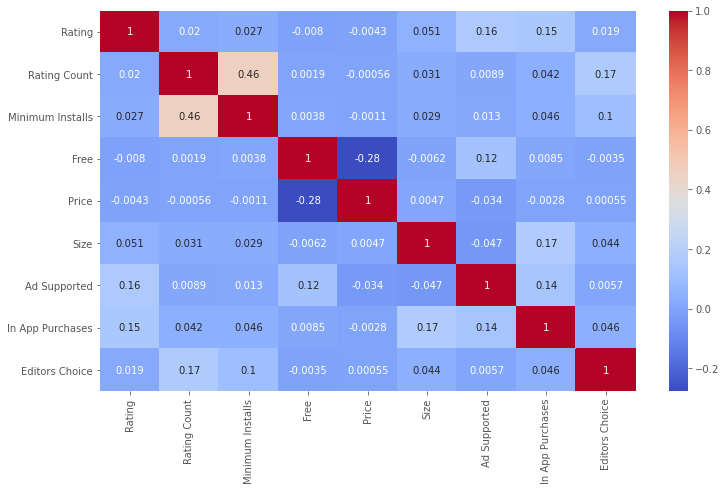

In [36]:
# Presenting the correlation as a heatmap for better visualisation
fig, ax = plt.subplots(figsize= (12,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax = ax)

At this point, the numerical variables seem to have many outliers and the distribution might be skewed. 
There are also little to no correlation between the variables. However, there is moderate correlation between Minimum installs and Rating count at 0.46, which is logical as increased number of installs will usually lead to more users and eventually more rating counts. 


Now, let us check out the boxplots of the numerical variables to look at the spread and the outliers. 

Text(0.5, 0.98, 'Boxplots of Numerical Variables')

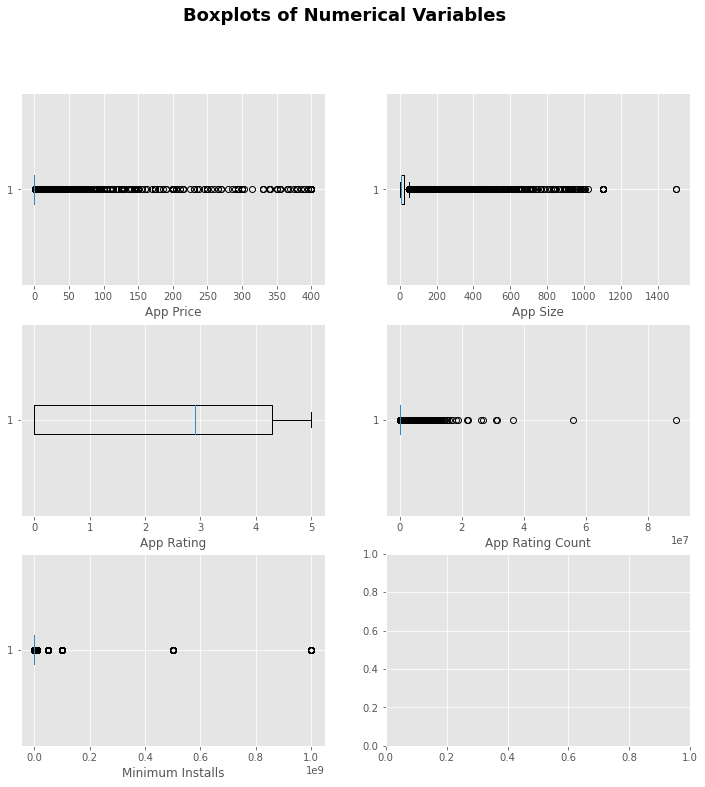

In [37]:
# Create boxplots for numerical variables 
fig, [[ax0, ax1], [ax2, ax3], [ax4, ax5]] = plt.subplots(nrows = 3, ncols = 2, figsize = (12,12))
ax0.boxplot ( x = 'Price', data = df, vert= False)
ax0.set(xlabel = 'App Price')
ax1.boxplot ( x = 'Size', data = df, vert= False)
ax1.set(xlabel = 'App Size')
ax2.boxplot ( x = 'Rating', data = df, vert= False)
ax2.set(xlabel = 'App Rating')
ax3.boxplot ( x = 'Rating Count', data = df, vert= False)
ax3.set(xlabel = 'App Rating Count')
ax4.boxplot ( x = 'Minimum Installs', data = df, vert= False)
ax4.set(xlabel = 'Minimum Installs')

# Add a title for the entire figure as a whole
fig.suptitle ( 'Boxplots of Numerical Variables', fontsize = 18, fontweight = 'bold')

As expected, there are a lot of outliers in most of the numerical variables. Therefore, binning will be done for all the numerical variables to ensure that the analysis will be meaningful and efficient. 

## **Binning of numerical variables**
1. Rating
2. Rating Count
3. Price
4. Minimum Installs 
5. Size 

**1. Rating**

C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



[Text(0.5, 1.0, 'Histogram for Rating')]

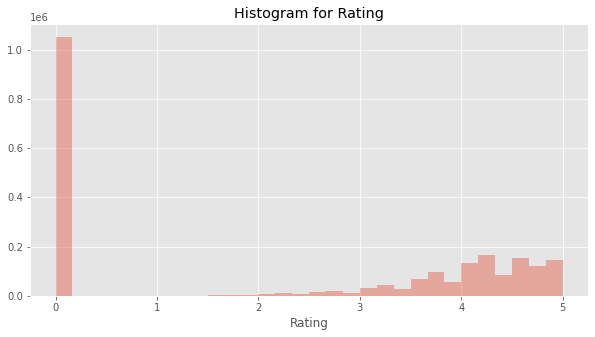

In [131]:
# Create a histogram to observe the spread for ratings
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(df['Rating'], kde = False, bins = 30, ax = ax)
ax.set( title = 'Histogram for Rating')

It seems like majority of ratings are 0. Therefore, we can zoom into the those with ratings.

[Text(0.5, 1.0, 'Histogram for Ratings > 0')]

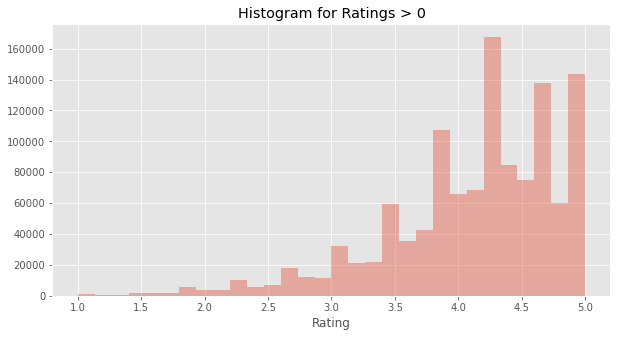

In [132]:
true_ratings = df.loc[df['Rating']>0, :]
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(true_ratings['Rating'], kde = False, bins = 30, ax = ax)
ax.set(title = 'Histogram for Ratings > 0')

The bins for ratings will be : 

0 - 0.5 = Very Poor

0.5 - 3.0 = Poor 

3.0 - 4.0 = Moderate 

4.0 - 4.5 = Good

4.5 - 5.0 = Excellent 

In [40]:
# Binning for ratings
bins = [0.0, 0.5, 3.0, 4.0, 4.5, 5.0]
binlabel = ['Very Poor', 'Poor', 'Moderate', 'Good', 'Excellent']
df['Rating Perf'] = pd.cut(x = df['Rating'], bins = bins, labels = binlabel)

df.loc[df['Rating Perf'].isnull(), 'Rating Perf'] = 'Very Poor'
df['Rating Perf'].value_counts(normalize = False)

Very Poor    1051091
Good          395684
Moderate      369021
Excellent     341715
Poor          101632
Name: Rating Perf, dtype: int64

**2. Rating Count**

Bins for Rating Count:

0 = No ratings 

0 to 10000 = Less than 10k 

10000 - 500k = Between 10k and 500k

Above 500k = More than 500k

In [41]:
# Binning for Rating Count 
df['Rating Count Type'] = 'No Rating'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'Rating Count Type'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'Rating Count Type'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'Rating Count Type'] = 'More than 500K'
df['Rating Count Type'].value_counts(normalize = False)

Less than 10K           1173187
No Rating               1051091
Between 10K and 500K      33495
More than 500K             1370
Name: Rating Count Type, dtype: int64

**3. Price**

Bins for price: 

0 - 0.1 = Free

0.1 - 9.99 = Low

9.99 - 49.99 = Mid

49.99 - 400 = High

In [42]:
# Binning for Price 
bins = [0, 0.1, 9.99, 49.99, 400.00]
binlabel = ['Free', 'Low', 'Mid', 'High']
df['Price Type'] = pd.cut(x = df['Price'], bins = bins, labels = binlabel)

df.loc[df['Price Type'].isnull(),'Price Type'] = 'Free'
df['Price Type'].value_counts(normalize = False)

Free    2216375
Low       39917
Mid        2389
High        462
Name: Price Type, dtype: int64

**4. Minimum Installs**

Bins for Minimum Installs:

0 = Zero

1 to 1000 = Low

5000 to 500000 = Mid

1e6 to 1e9 = High

In [43]:
# Binning for Minimum Installs
bins = [0.0, 0.5, 5000.0, 1000000.0, 1000000000.0]
binlabel = ['Zero', 'Low', 'Mid', 'High']
df['Installs Level'] = pd.cut(x = df['Minimum Installs'], bins = bins, labels = binlabel)
df.loc[df['Installs Level'].isnull(), 'Installs Level'] = 'Zero'
df['Installs Level'].value_counts(normalize = True)*100

Low     77.290681
Mid     21.638825
High     0.572916
Zero     0.497578
Name: Installs Level, dtype: float64

**5. Size**

Bins for Size: 

0 - 16 mb = Standard ( I did a research on the standard app size and it is usually around 12 to 16 mb)

16 - 50 mb = Mid

50 mb - 100 mb = Large

More than 100 mb = Extra Large 

[Text(0.5, 1.0, 'Histogram for App Size')]

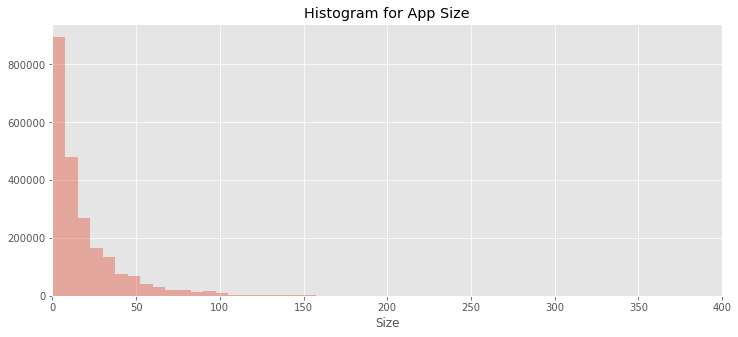

In [133]:
# Check the spread of Size using a histogram
fig, ax = plt.subplots(figsize = (12,5))
ax= sns.distplot(df['Size'], kde = False,bins = 200, ax = ax)
ax.set_xlim(0, 400) # Limit from 0 to 400 mb as the range typically falls within these limits 
ax.set(title = 'Histogram for App Size')

In [45]:
# Binning for Size 
df['Size Type'] = 'Varies with Device'
df.loc[(df['Size'] > 0) & (df['Size'] <= 16.0),'Size Type'] = 'Standard'
df.loc[(df['Size'] > 16.0) & (df['Size'] <= 50.0),'Size Type'] = 'Mid'
df.loc[(df['Size'] > 50.0) & (df['Size'] <= 100.0),'Size Type'] = 'Large'
df.loc[(df['Size'] > 100.0) ,'Size Type'] = 'Extra Large'
df['Size Type'].value_counts(normalize = False)

Standard              1428487
Mid                    605429
Large                  167325
Varies with Device      30389
Extra Large             27513
Name: Size Type, dtype: int64

In [46]:
df['Size Type'].unique()

array(['Standard', 'Mid', 'Large', 'Extra Large', 'Varies with Device'],
      dtype=object)

## Categorical Variables 

1. Category
2. Installs
3. Free
4. Minimum Android 
5. Last Updated 
6. Content Rating
7. Privacy Policy
8. Ad supported
9. In App Purchases
10. Editors Choice

**1. Category** 

[Text(0.5, 1.0, 'Categories'), Text(0.5, 0, 'Count')]

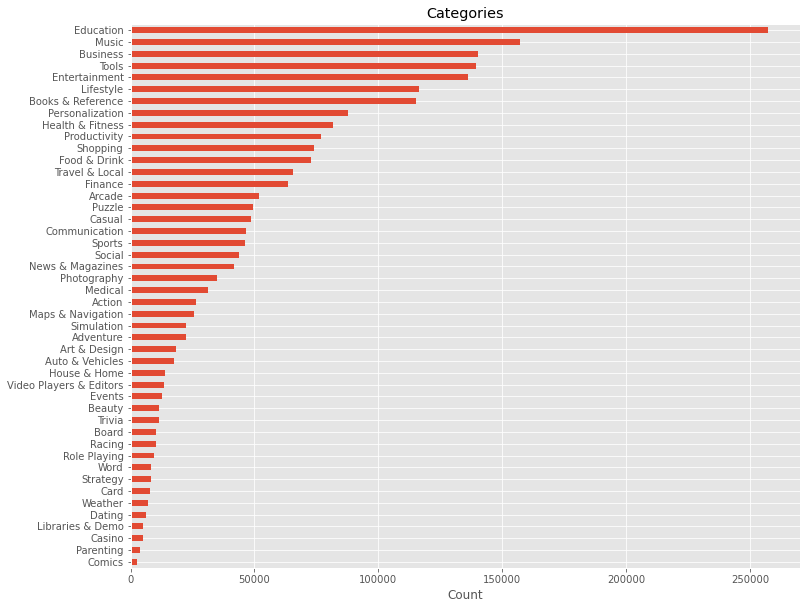

In [47]:
# Create a barplot for the categories 
fig, ax = plt.subplots(figsize = (12,10))
df['Category'].value_counts(normalize = False).sort_values(ascending = True).plot(kind = 'barh', ax = ax)
ax.set(title = 'Categories', xlabel = 'Count')

Top 10 categories are Education, Music, Tools , Business, Entertainment, Books & Reference, Lifestyle, Personalisation, Health & Fitness, productivity

In [48]:
# Find out the percentage of apps in the top 10 categories out of the entire dataset
(df['Category'].value_counts().sort_values(ascending = False).head(10).sum()/len(df))*100

57.902000891488505

Top 10 categories already took up 58% of the entire dataset, therefore, we might zoom in to look at just the top 10 categories later on. 

**2. Installs**

Before visualising the Installs on a graph, I will first set the order of the installs number for better visualisation. 

In [49]:
# Create custom ordering for the column Installs 
list_ordering = ['0+', '1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100,000+', '500,000+', '1,000,000+', '5,000,000+',' 10,000,000+', '50,000,000+', '100,000,000+','500,000,000+','1,000,000,000+']  
df["Installs"] = pd.Categorical(df["Installs"], categories=list_ordering) 

[Text(0.5, 1.0, 'No. of App Installs'), Text(0.5, 0, 'Count')]

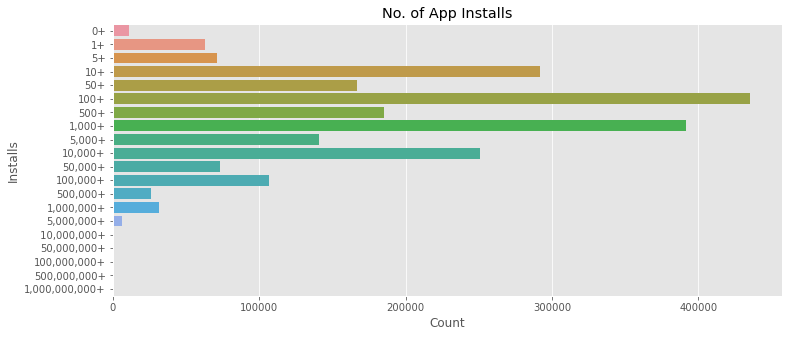

In [50]:
# Create a countplot of Installs 
fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.countplot(y = 'Installs', data = df)
ax.set(title = 'No. of App Installs', xlabel = 'Count')

Most apps only have installation numbers around 100 to 1000+ , this shows how competitive the market is and only a small fraction of the apps can make it to installation numbers more than 1 million +

**3. Free, Content Rating, Privacy Policy, Ad supported, in app purchases, Editors choice**

Text(0.5, 0.98, 'Countplots of Categorical Variables')

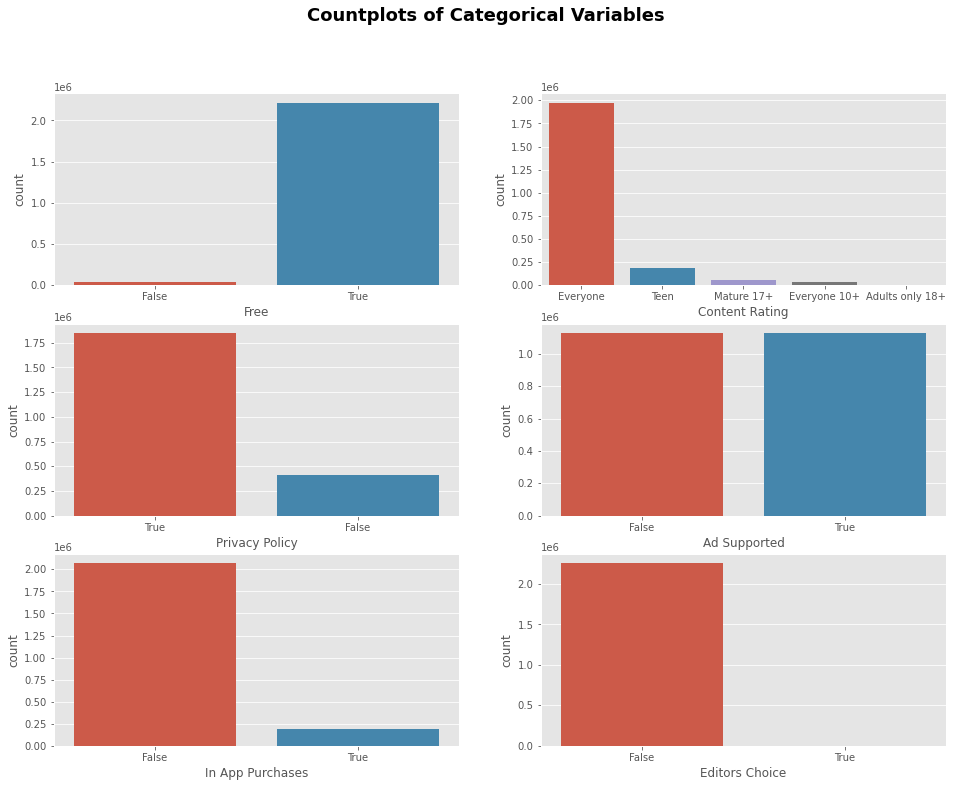

In [51]:
# Create countplots for the columns for visualisation of the frequency
fig, [[ax0, ax1], [ax2, ax3], [ax4,ax5]] = plt.subplots(nrows = 3, ncols = 2, figsize = (16,12))
sns.countplot(ax=ax0, data= df, x='Free')
sns.countplot(ax=ax1, data= df, x='Content Rating')
sns.countplot(ax=ax2, data= df, x='Privacy Policy')
sns.countplot(ax=ax3, data= df, x='Ad Supported')
sns.countplot(ax=ax4, data= df, x='In App Purchases')
sns.countplot(ax=ax5, data= df, x='Editors Choice')

# Create a title for the entire figure as a whole
fig.suptitle ( 'Countplots of Categorical Variables', fontsize = 18, fontweight = 'bold')

From the countplots , most apps are :
- Free
- Rated 'Everyone' for content rating 
- Includes a privacy policy 
- Do not have in -app purchases 
- Not an Editor's Choice 



**4. Minimum Android**

Before visualising the Minimum Android on a graph, I will first set the order of the installs number for better visualisation. 

In [52]:
# Create custom ordering for the column Minimum Android 
list_ordering1 = ['1.0', '1.1', '1.5', '1.6', '2.0', '2.0.1', '2.1', '2.2', '2.3', '2.3.3', '3.0', '3.1', '3.2', '4.0', '4.0.3',' 4.1', '4.2', '4.3','4.4','4.4W', '5.0', '5.1', '6.0', '7.0', '7.1', '8.0']  
df["Minimum Android"] = pd.Categorical(df["Minimum Android"], categories=list_ordering1) 

[Text(0.5, 1.0, 'Minimum Android Supported'), Text(0.5, 0, 'Count')]

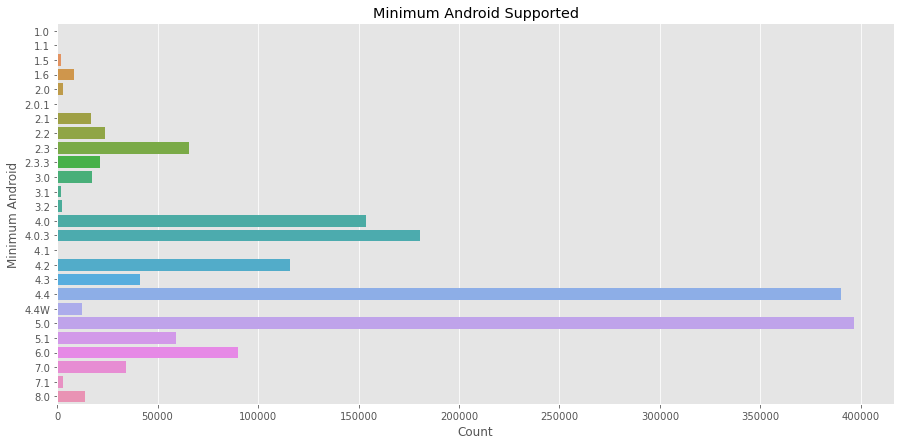

In [53]:
# Create a countplot of Minimum Android 
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(y = 'Minimum Android', data= df, ax = ax)
#ax = df['Minimum Android'].value_counts(normalize = False).sort_values(ascending = True).plot(kind = 'barh')
ax.set(title = 'Minimum Android Supported', xlabel = 'Count')

The most common minimum android systems are 4.4 and 5.0. 

**5. Last Updated**

In order to get as sensing of how recent the apps are being updated , a column named 'Months Elapsed' will be created to indicate the number of months since the last app update from 30 June 2021, when the data was scraped. 

In [54]:
#Get the difference in time between 30th June 2021 (when data was scraped) and the Last updated date
import datetime
Diff = (datetime.datetime(2021, 6, 30) - df['Last Updated'])
df['Months Elapsed']= Diff/np.timedelta64(1,'M')   # Convert the time difference into months

In [55]:
# Create a new column for Months Elapsed and round the months to whole number 
df['Months Elapsed'] = round(df['Months Elapsed'],0)
df['Months Elapsed']

0          16.0
1           2.0
2          22.0
3          33.0
4          32.0
           ... 
2312939     1.0
2312940    41.0
2312941    34.0
2312942     2.0
2312943    22.0
Name: Months Elapsed, Length: 2259143, dtype: float64

In [58]:
# Get the statistics for 'Months Elapsed' column to get a feel of the data
df['Months Elapsed'].describe()

count    2.259143e+06
mean     1.887831e+01
std      1.828737e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.400000e+01
75%      2.700000e+01
max      1.490000e+02
Name: Months Elapsed, dtype: float64

From here, it is interesting to observe that the mean months elapsed = 19 months, which is around 1.5 years since the apps were last updated. 

## Conclusion of univariate exploration 

For this section, the analysis shows that most apps falls within the top 10 categories : Education, Music, Tools , Business, Entertainment, Books & Reference, Lifestyle, Personalisation, Health & Fitness, productivity

Majority of the apps are: 
- Free
- No ratings
- Rated Zero 
- Rated 'Everyone' for content rating 
- Includes a privacy policy 
- Do not have in -app purchases 
- Not an Editor's Choice 
- Have install numbers from 100+ to 1000+ 
- Have a standard app size less than 16 mb 
- Minimum android supported 4.4 and 5.0 
- Average of 1.5 years since app was last updated 

# 4. Bi-variate and multi-variate exploration to address the goals 

In this section, we will look into how the different variables affect our metrics - ratings and installation numbers. This will help to address our goals set in the beginning of this analysis. 

**1. How do the features of an application affect its success?**
    
    a) What are the top app categories in the market?
    
    b) How do the ratings and install numbers differ between the application categories? 
    
    c) How does the application price influence the application rating and installation numbers? 
    
    d) How does the application size influence the application rating and installation numbers?
    
    e) What is the optimal minimal android system supported for an application to achieve high ratings and high installation numbers?
    
    f) Would a well-maintained application achieve higher ratings and installation numbers?
    
    g) What is the most popular content rating for successful applications? 
    
    h) Does having a privacy policy enhances the success of an application? 
    
    i) How does being listed as an Editor's Choice affect the success of an applications? 
    
    j) Are there applications with high installs and yet low ratings , translating to possible user disappointment? 
    
 
**2. What is an optimal business model of a successful application?**
 
     a) Are successful applications usually free or paid ? 
     
     b) How do ad-supported applications and applications with in-app purchases differ in terms of ratings and installation numbers?
     


# 1. How do the features of an application affect its success?

## 1. Category

### a) What are the top app categories in the market?
 
    As explored in the previous section, the top 10 app categories in terms of numbers are : 
    1. Education
    2. Music
    3. Tools
    4. Business
    5. Entertainment
    6. Books & Reference 
    7. Lifestyle 
    8. Personalisation
    9. Health & Fitness 
    10. Productivity
    
    
As the top 10 apps make up nearly 60% of the entire market, we will zoom into these top 10 apps for this analysis.

In [59]:
#Create a subset of the dataset consisting just the Top 10 categories in the market
top10 = df.loc[df['Category'].isin(['Education', 'Music', 'Tools', 'Business', 'Entertainment', 'Books & Reference', 'Lifestyle', 'Personalisation', 'Health & Fitness', 'Productivity']), :]

In [60]:
# Check out the top 5 rows of the top10 dataset
top10.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Size,Minimum Android,...,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Rating Perf,Rating Count Type,Price Type,Installs Level,Size Type,Months Elapsed
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,True,0.0,2.9,5.0,...,True,True,False,False,Good,Less than 10K,Free,Low,Standard,2.0
2,Vibook,Productivity,0.0,0.0,50+,50.0,True,0.0,3.7,4.0.3,...,True,False,False,False,Very Poor,No Rating,Free,Low,Standard,22.0
4,GROW.me,Tools,0.0,0.0,100+,100.0,True,0.0,6.2,NaN,...,True,False,False,False,Very Poor,No Rating,Free,Low,Standard,32.0
7,The Everyday Calendar,Lifestyle,2.0,39.0,500+,500.0,True,0.0,16.0,5.0,...,True,False,False,False,Poor,Less than 10K,Free,Low,Standard,24.0
17,All in one shopping app,Tools,5.0,6.0,50+,50.0,True,0.0,2.0,NaN,...,False,False,False,False,Excellent,Less than 10K,Free,Low,Standard,26.0


### b) How do the ratings and install numbers differ between the application categories? 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Tools'),
  Text(1, 0, 'Productivity'),
  Text(2, 0, 'Lifestyle'),
  Text(3, 0, 'Books & Reference'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Health & Fitness'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Business')])

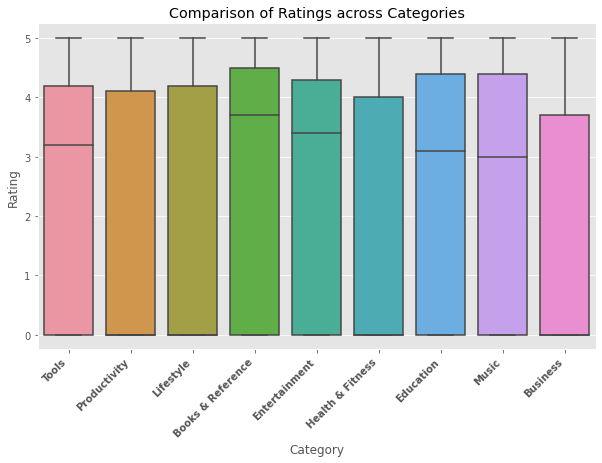

In [61]:
# Create boxplots across categories 
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot( x = 'Category', y = 'Rating', data = top10)
ax.set(title = 'Comparison of Ratings across Categories')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right')

The ratings for Books & Reference, Entertainment and tools are generally higher compared to other categories.

We shall now dive deeper into the ratings. As there are two distinct groups - one with zero rating and the other with ratings, we will divide them into two groups and look at the group with actual ratings. 

C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



[Text(0.5, 1.0, 'Histogram of Ratings')]

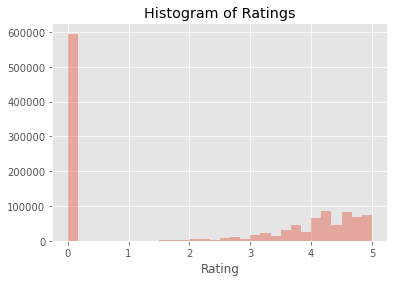

In [62]:
# Create a histogram to show the distinct group in ratings 
fig,ax = plt.subplots ()
ax = sns.distplot(top10['Rating'], kde = False, bins = 30)
ax.set( title = 'Histogram of Ratings')

In [63]:
# Create two groups for ratings , one with rating more than 0 and the other with rating = 0 
trueratings = top10.loc[top10['Rating']>0, :]
zeroratings = top10.loc[top10['Rating'] == 0, :]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Tools'),
  Text(1, 0, 'Lifestyle'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Health & Fitness'),
  Text(4, 0, 'Books & Reference'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'Productivity'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Business')])

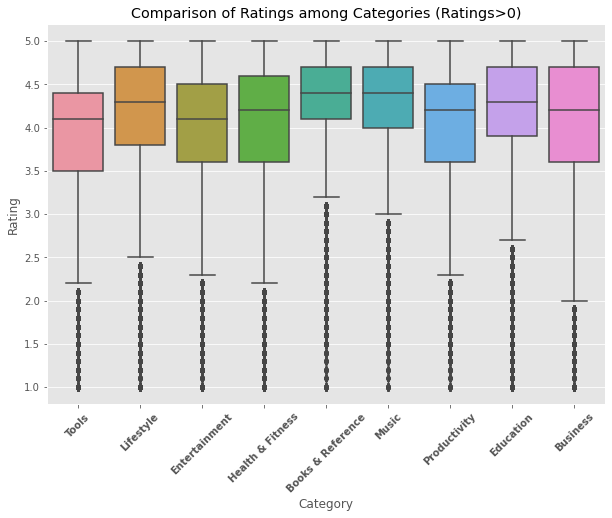

In [64]:
# Create a boxplot comparison for apps with only rating more than 0 
fig, ax = plt.subplots(figsize = (10, 7))
sns.boxplot( x = trueratings['Category'], y = trueratings['Rating'], ax = ax)
ax.set(title = 'Comparison of Ratings among Categories (Ratings>0)')
plt.xticks(fontsize=10,fontweight='bold',rotation=45)

The difference in ratings become even more distinct for apps with ratings >0. 
Categories with higher ratings are Books & Reference, Music, Education and Lifestyle. On the contrary, tools now generally have the lowest rating. 

Now we shall dive deeper to see how rating performance fare for each category.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Tools'),
  Text(1, 0, 'Productivity'),
  Text(2, 0, 'Lifestyle'),
  Text(3, 0, 'Books & Reference'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Health & Fitness'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Business')])

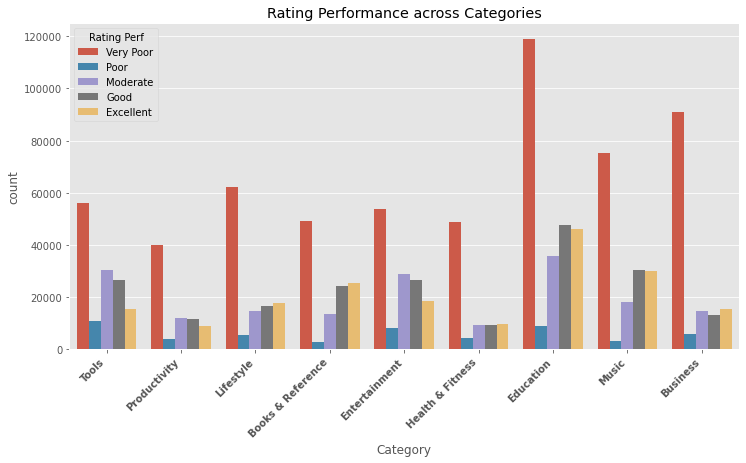

In [65]:
# Create countplot showing how rating perf differ across categories
fig, ax = plt.subplots (figsize = (12,6))
sns.countplot(x = top10['Category'], hue = top10['Rating Perf'], ax = ax)
ax.set(title = 'Rating Performance across Categories')
plt.xticks(fontsize=10,fontweight='bold',rotation=45, ha = 'right')

From the graph, most categories have very poor ratings ( zero ratings). However, it is interesting to note that for books and references, music , education , the number of excellent and good ratings is higher than poor ratings. 

Let us now look at the Rating Count for each category. We shall start off with overview of Rating Count Type.

[Text(0.5, 1.0, 'Countplot of Rating Count Type')]

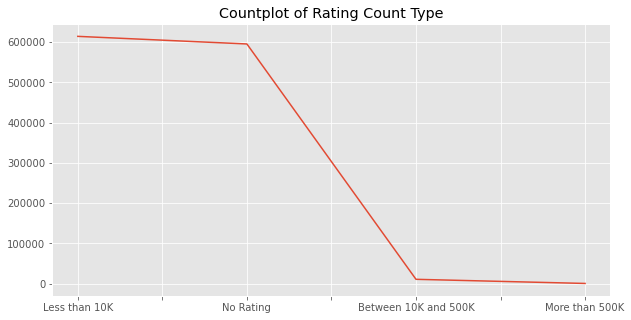

In [66]:
# Create a countplot of rating count type to get an overall picture 
fig, ax = plt.subplots(figsize = (10, 5))
top10['Rating Count Type'].value_counts().plot(ax = ax)
ax.set(title = 'Countplot of Rating Count Type')

Looks like most of the rating count falls under 10K or have no ratings at all. Only a small proportion of apps managed to get more than 10K ratings. This again shows how competitive the market can be. 

We will now look at how the rating count differs across categories. 

[Text(0.5, 1.0, 'Comparison of Rating Count Type across Categories')]

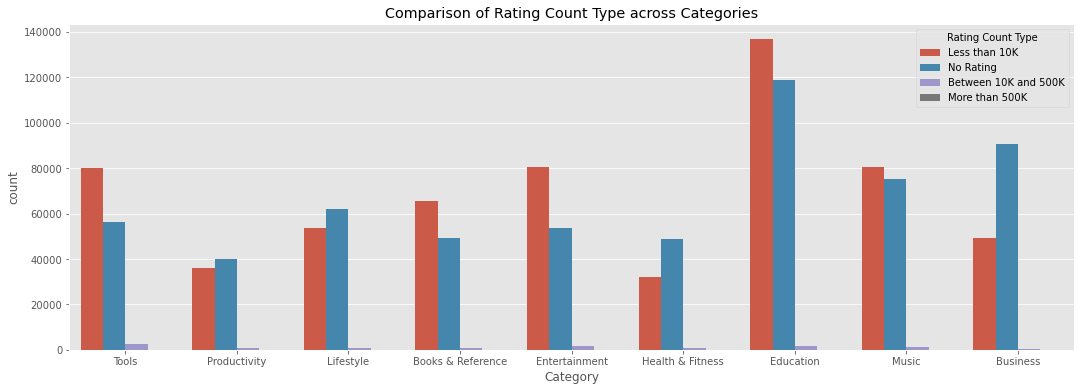

In [67]:
# Create countplot on how rating count type differs across categories 
fig, ax = plt.subplots(figsize = (18, 6))
ax = sns.countplot( x = 'Category', data = top10, hue = 'Rating Count Type')
ax.set(title = 'Comparison of Rating Count Type across Categories')


One interesting point to note would be the relatively higher rating count type ' More than 500K'  in Tools. This indicates that Tools have a higher number of apps with more than 500K ratings.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Business'),
  Text(1, 0, 'Education'),
  Text(2, 0, 'Books & Reference'),
  Text(3, 0, 'Lifestyle'),
  Text(4, 0, 'Health & Fitness'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Productivity'),
  Text(8, 0, 'Tools')])

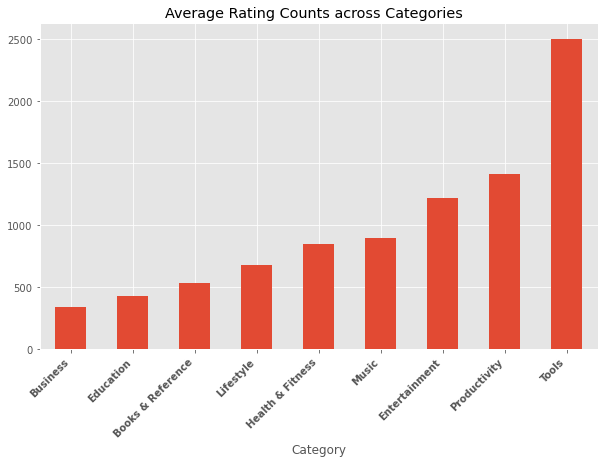

In [68]:
# Create a countplot of average rating count across categories 
fig, ax = plt.subplots(figsize = (10,6))
ax = top10.groupby(['Category'])['Rating Count'].mean().sort_values(ascending = True).plot(kind = 'bar', ax = ax)
ax.set (title = 'Average Rating Counts across Categories  ')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right')

Indeed, Tools have the highest number of rating counts among all categories.

Next , we will explore how the installation numbers vary across categories. For this part of the analysis, only rated apps with high installs ( more than 1 million installs) and will be considered. 

[Text(0.5, 1.0, 'Average Install Numbers across Categories and Rating Perf.'),
 Text(0.5, 0, 'Average Install No.')]

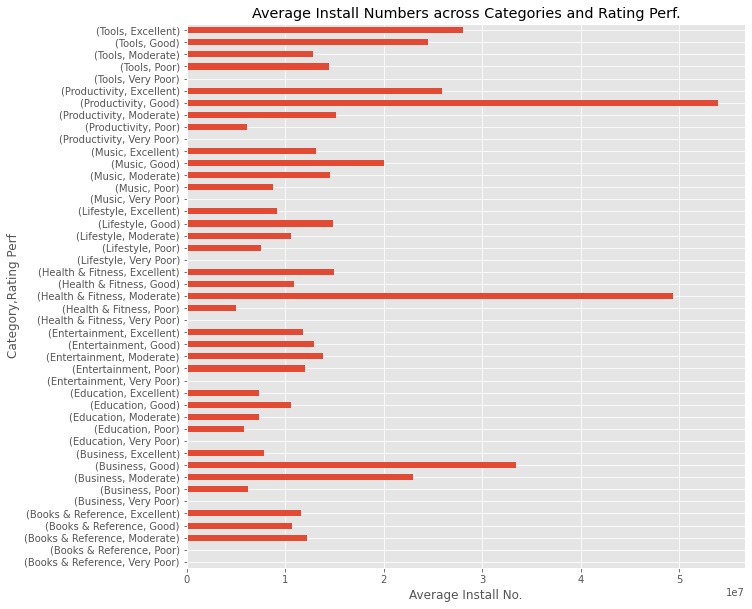

In [69]:
# Creating a subset dataset consisting of apps with rating > 0 and more than 1 million installs
trueratings_installs= top10.loc[(top10['Rating']>0) & (top10['Minimum Installs']>1e6), :]

#Create a barplot which integrate both categories and rating performance against the average install numbers
fig, ax = plt.subplots(figsize = (10, 10))
trueratings_installs.groupby(['Category', 'Rating Perf'])['Minimum Installs'].mean().plot(kind = 'barh', ax= ax)
ax.set(title = 'Average Install Numbers across Categories and Rating Perf.', xlabel = 'Average Install No.' )

#### Conclusion

In conclusion, the Google Play Store market is an extremely competitive one. Only a small fraction of the apps can garner high ratings and high installs. Books & Reference, Music, Education and Lifestyle have higher ratings compared to the rest while Tools generally has the lowest rating. Although all categories have high proportion of very poor ratings (zero rating), certain categories like Books and References, music , education have a higher number of excellent and good ratings compared to poor rating. Only a small proportion of apps managed to get more than 10K ratings. This again shows how competitive the market can be. 

There is a higher number of high installs in Tools, Productivity, Health and Fitness, and Business, mostly in apps with Good or Excellent rating performance. 

One interesting point to note is that under the category - Tools, apps have lower ratings but yet have the highest number of apps with more than 500K rating count and high install numbers (>1 million). This shows that apps under Tools are widely used and have a huge user base. As these apps, which include communication apps, are used heavily daily, there are bound to be higher rating count. However, due to digitalisation and heavy reliance on Tool apps, a slight lag or bug disrupting user experience would easily lead to poor ratings given by users. Users can be relatively more critical when it comes to Tool apps that are heavily used on a daily basis. 


Additionally, what is worth noting is the presence of apps with poor rating performances with high installs more than 1 million. 
Why would apps with high install numbers have poor ratings? Which category do most of the apps fall under?  


### j) Are there applications with high installs and yet low ratings , translating to possible user disappointment?

We shall look at apps with Poor rating performanace and yet have high installs. 

In [70]:
#Create a subset dataset of apps with high installs ( more than 1 million) and have poor rating performance
user_disap = trueratings_installs.loc[trueratings_installs['Rating Perf'].isin(['Poor']), ['App Name', 'Category']]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Health & Fitness'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Productivity'),
  Text(3, 0, 'Music'),
  Text(4, 0, 'Tools'),
  Text(5, 0, 'Lifestyle'),
  Text(6, 0, 'Business'),
  Text(7, 0, 'Education')])

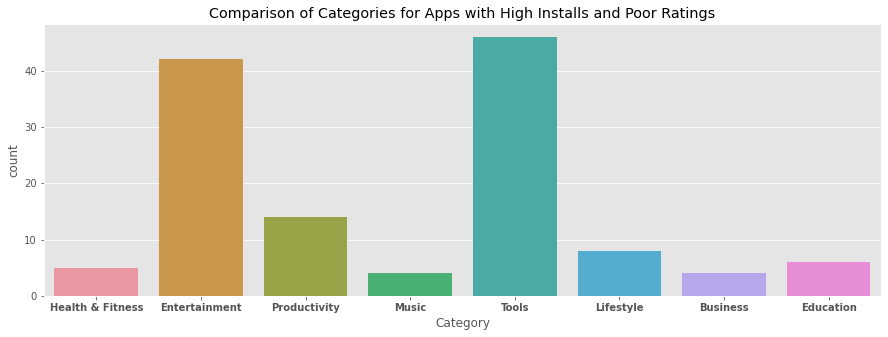

In [71]:
#Create a countplot for categories of apps with high installs and low ratings 
fig,ax = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Category', data = user_disap, ax = ax)
ax.set(title = 'Comparison of Categories for Apps with High Installs and Poor Ratings')
plt.xticks(fontsize=10,fontweight='bold')

#### Conclusion

Surprisingly, apps in the Tools and Entertainment categories have a higher possibility of user disapppointment. This may be due to the popularity and necessity of such app categories in our daily lives, which lead to high installs. Tools include communication apps that we use frequently on a daily basis.

With the frequent usage of such apps, there are bound to be more installs. A slight breakdown in such essential daily apps will easily lead to high number of poor ratings from a large group of users.

Entertainment play a huge role in our daily lives as well. Users often download entertainment apps but might find that the apps do not meet their expectations. Furthermore, users can have demanding expectations on the entertainment app that they use daily. A slight bug or lag in the app will lead to users giving poor ratings. 

## 2. App Price 

### c) How does the application price influence the application rating and installation numbers? 

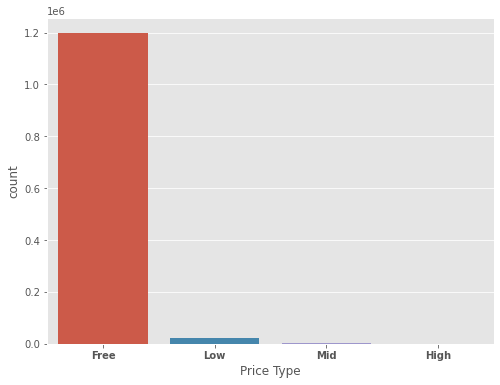

In [72]:
# Create a countplot to get an overview picture of app price 
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot( x = 'Price Type', data = top10)
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

Most of the apps are free in the market. Let us take a look at how the price type compares against the ratings. 

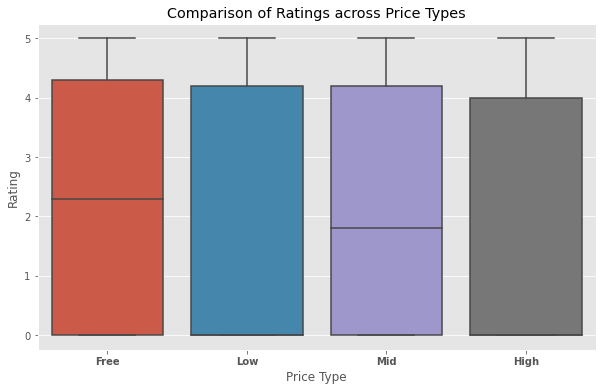

In [73]:
# Create boxplots for comparison of ratings acorss different price types 
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot( x = 'Price Type', y = 'Rating', data = top10)
ax.set(title = 'Comparison of Ratings across Price Types')
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

Surprisingly, ratings for free apps are higher compared to other price types. 

Let us explore how installation numbers can influence the app price. 

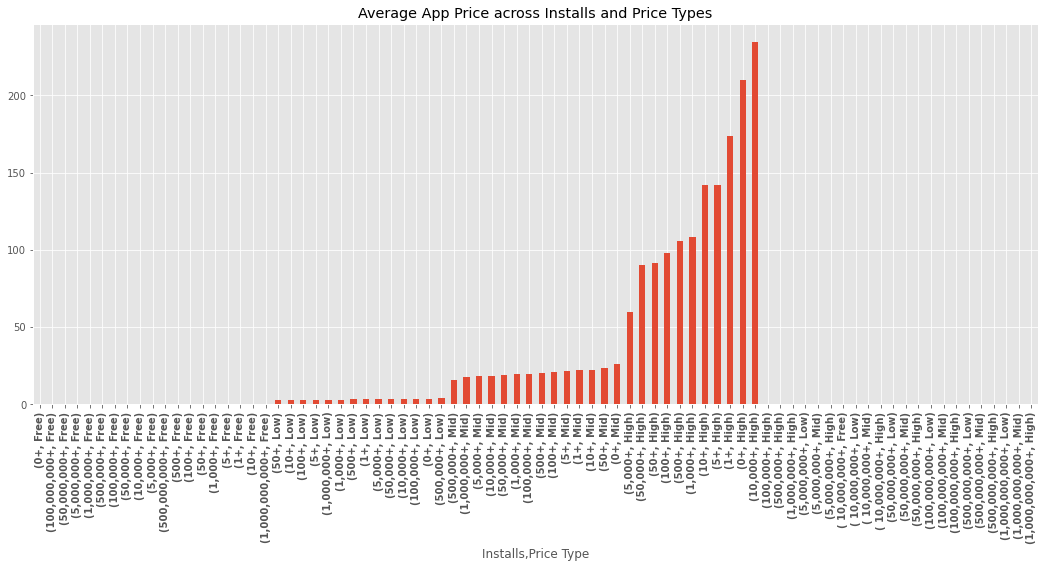

In [74]:
# Create a bar plot showing the average price by grouping installs and price type together. 
fig, ax = plt.subplots(figsize = (18,7))
ax = top10.groupby(['Installs', 'Price Type'])['Price'].mean().sort_values(ascending = True).plot(kind = 'bar', ax = ax)
ax.set ( title = 'Average App Price across Installs and Price Types')
plt.xticks(fontsize=10,fontweight='bold',rotation=90);

Apps with low price type tend to have a higher number of installs compared to apps with mid and high price types. 

We will dive deeper and look into the most common price type for successful apps with good rating performance (Good, excellent) and high installs ( more than 1 million).

[Text(0.5, 1.0, 'Price Type for Apps with Good Ratings and High Installs')]

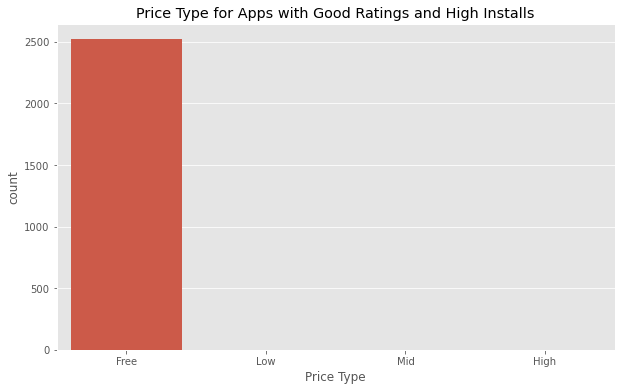

In [75]:
# Create a subset dataset consisting of successful apps with good rating performance and high installs
goodratings_installs= top10.loc[(top10['Rating Perf'].isin(['Good', 'Excellent'])) & (top10['Minimum Installs']>1e6), :]

# Create a countplot showing the the price type for successful apps
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x = 'Price Type', data = goodratings_installs, ax= ax)
ax.set(title = 'Price Type for Apps with Good Ratings and High Installs')

#### Conclusion
Free apps tend to be more successful , earning higher ratings and high install numbers. Apps which are priced higher have lesser installs and poorer rating performance. 

This may be largely due to the fact that users are more likely to download a free app than to pay for an app. With more users downloading the free apps, there will be a higher chance of getting a good rating as well. 

## 3. App Size 

### d) How does the application size influence the application rating and installation numbers?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Standard'),
  Text(1, 0, 'Mid'),
  Text(2, 0, 'Large'),
  Text(3, 0, 'Extra Large'),
  Text(4, 0, 'Varies with Device')])

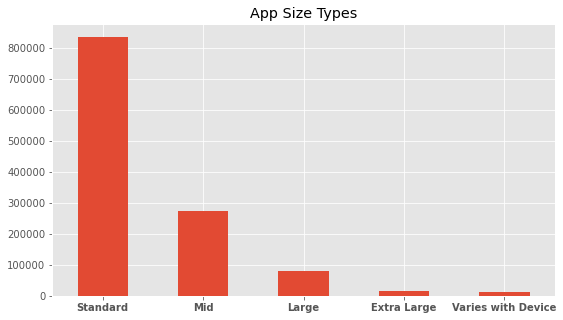

In [76]:
# Create a bargraph to show the overall picture of the size type
fig, ax = plt.subplots(figsize = (10, 6))
top10['Size Type'].value_counts().plot(kind= 'bar', figsize = (9,5), ax = ax)
ax.set(title = 'App Size Types')
plt.xticks(fontsize=10,fontweight='bold',rotation=0)

Most apps have a standard size of 16MB and below. 

We will now explore how ratings vary across different size types. 

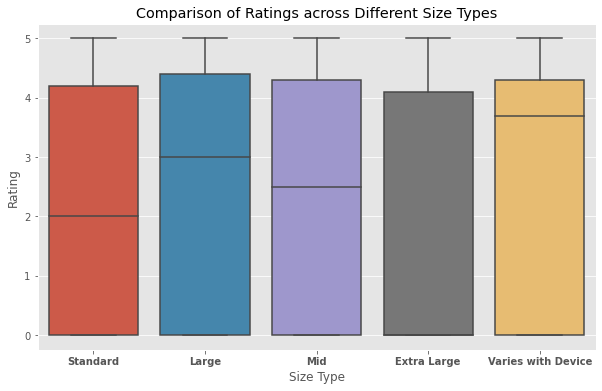

In [77]:
# Create boxplots to compare ratings across different size types
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot( x = 'Size Type', y = 'Rating', data = top10, ax = ax)
ax.set(title = 'Comparison of Ratings across Different Size Types')
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

Surprisingly, app size that varies with device has higher ratings compared to other size types.

Let us proceed to explore how the installation numbers vary with app sizes. 

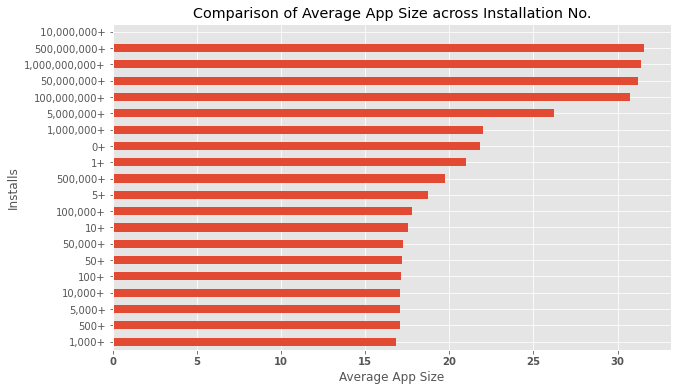

In [78]:
# Create a bar plot to show the average app size across installation numbers
fig, ax = plt.subplots(figsize = (10, 6))
top10.groupby('Installs')['Size'].mean().sort_values(ascending = True).plot(kind = 'barh', ax = ax)
ax.set(title = 'Comparison of Average App Size across Installation No.', xlabel = 'Average App Size')
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

Apps with larger size tend to have high installation numbers .

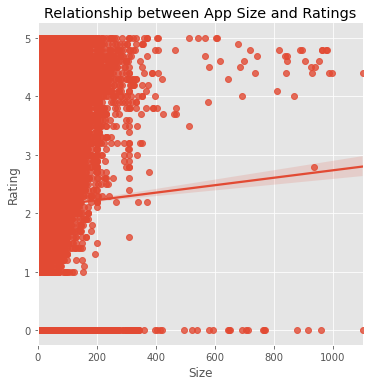

In [79]:
# Create a lmplot to observe the relationship between rating and app size for the top 10 categories
ax = sns.lmplot(x ='Size', y ='Rating', data = top10)
ax.set ( title = 'Relationship between App Size and Ratings')

Again, the plot shows that most of the apps with large app size have higher ratings ( 4.0 - 5.0). 

Next , we shall find out what is the most common app size type in sucessful apps with high installs and good ratings

[Text(0.5, 1.0, 'Size Type for Apps with Good Ratings and High Installs')]

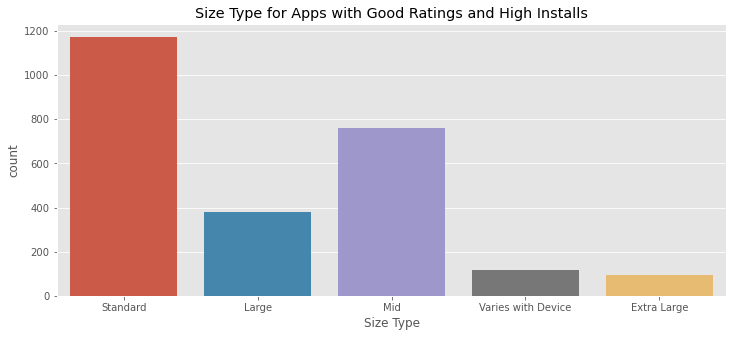

In [80]:
# Create a countplot for app size types for successful apps with good ratings and high installs
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(x = 'Size Type', data = goodratings_installs, ax= ax)
ax.set(title = 'Size Type for Apps with Good Ratings and High Installs')

#### Conclusion
Although the standard app size is the most common in the market, apps with larger sizes tend to have high installation numbers and higher ratings. Large sizes might be more applicable for games where the app bundles need to include game assets and various SDKs. A large bundle size comes hand-in-hand with a rich game experience, thus eventually increases the appeal of the app. However, the results might only show the the outliers and might not be representative. 

As seen for successful apps with good ratings and high installs, the most common size type is still the standard size (<16 mb). Users tend to download app with smaller sizes.  If the app is too large, it may be difficult or expensive for users to download. It could turn users off before they even experience the app. A user’s device may have an extremely small amount of disk space, thus small app size has a higher appeal. This is particularly true if the developing world is part of your target market.

Surprisingly, the ratings for app size which varies with device are relatively higher as well. This may be due to app developers uploading multiple APKs for their apps. Google Play supports multiple APK support that allows you to publish different APKs for your application that are each targeted to different device configurations. Android applications usually run on most compatible devices with a single APK, by supplying alternative resources for different configurations (for example, different layouts for different screen sizes) and the Android system selects the appropriate resources for the device at runtime. However, a single APK might not be able to support all device configurations due to technical challenges. Therefore, having multiple APKs can ensure that the app is able to work on different device configurations. This also allows more devices to have access to the apps with sizes that varies with device. The high ratings could be due to the good app user experience on various devices.   

http://googlesystem.blogspot.com/2013/08/varies-with-device.html


## 4. Minimum Android Supported 

### e) What is the optimal minimal android system supported for an application to achieve high ratings and high installation numbers?

[Text(0.5, 1.0, 'Minimum Android System Supported')]

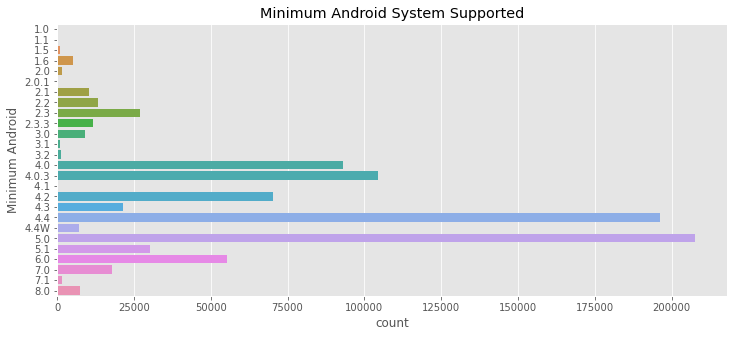

In [81]:
# Create a countplot to get an overview picture for minimum android
fig, ax = plt.subplots(figsize = ( 12,5))
sns.countplot( y = 'Minimum Android', data = top10, ax = ax)
ax.set(title = 'Minimum Android System Supported')

Most apps have a minimum android system of 4.4 and 5.0.

Let us explore the average installs across minimum android systems.

[Text(0.5, 1.0, 'Minimum Android System vs Average Install No.'),
 Text(0, 0.5, 'Average Install No. ')]

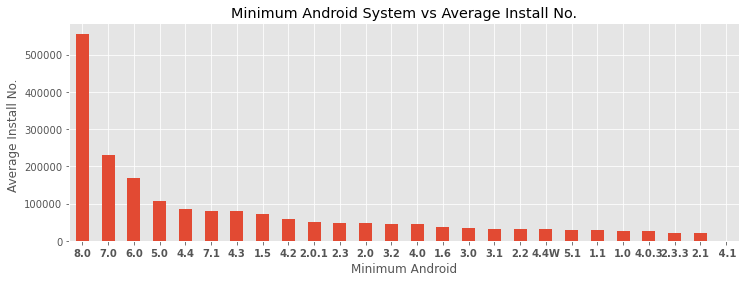

In [82]:
# Create a bar plot showing the average installs across minimum android systems
fig,ax = plt.subplots(figsize = (12,4))
top10.groupby(['Minimum Android'])['Minimum Installs'].mean().sort_values(ascending = False).plot(kind = 'bar',ax = ax)
plt.xticks(fontsize=10,fontweight='bold',rotation=0);
ax.set(title = 'Minimum Android System vs Average Install No.', ylabel = 'Average Install No. ')

The minimum android system 8.0 has the highest number of installs. 

Let us explore the average ratings across minimum android systems.

[Text(0.5, 1.0, 'Minimum Android System vs Average Rating.'),
 Text(0, 0.5, 'Average Rating ')]

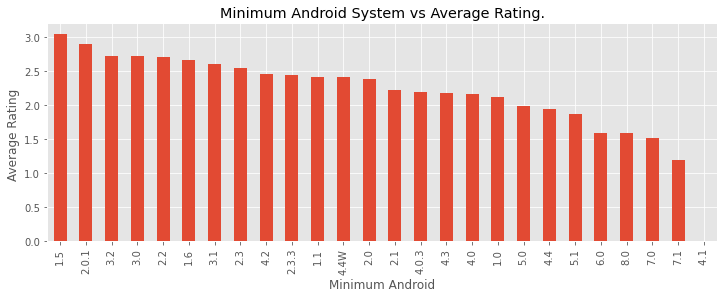

In [83]:
# Create a bar plot showing the average ratings across minimum android systems 
fig,ax = plt.subplots(figsize = (12,4))
top10.groupby(['Minimum Android'])['Rating'].mean().sort_values(ascending = False).plot(kind = 'bar',ax = ax)
ax.set(title = 'Minimum Android System vs Average Rating.', ylabel = 'Average Rating ')

Apps with an older minimum android systems tend to have the higher average rating. 

We shall now dive deeper to look at the minimum android systems for successful apps with good ratings and high installs.

[Text(0.5, 1.0, 'Minimum Android System for Apps with Good Ratings and High Installs')]

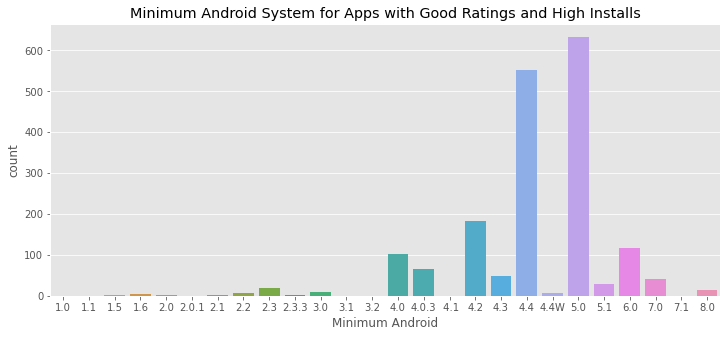

In [84]:
#Create a countplot for the minimum android systems for successful apps
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(x = 'Minimum Android', data = goodratings_installs, ax= ax)
ax.set(title = 'Minimum Android System for Apps with Good Ratings and High Installs')

#### Conclusion

In conclusion, successful apps tend to have the minimum android system supported at 5.0 and 4.4. Minimum android system 5.0 and 4.4 are also the most common android systems for the top 10 apps. Most apps could be running at its optimal mode from 4.4 and 5.0 onwards. 

The average installs, however, is the highest for android 8.0. Android 8.0 Oreo was introduced in 2017, when digitalisation and the use of social media apps and tools increased tremendously. This could boost the installs of these apps , especially those developed from 2017 onwards. 

Apps with older minimum android systems seem to have a higher average rating. This could be due to the fact that these apps have a larger target audience and they can run on a higher number of devices compared to newer version as the minimum android system supported. Therefore, the good user experience across a larger range of devices and systems might lead to higher average ratings.

## 5. Last Updated

### f) Would a well-maintained application achieve higher ratings and installation numbers?

C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



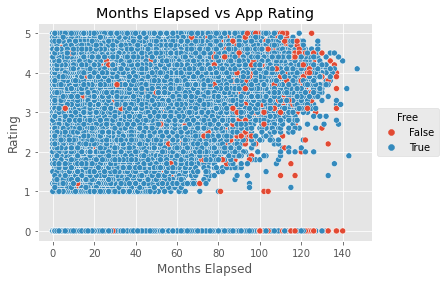

In [85]:
#Create a scatterplot for months elapsed since last updated vs ratings
fig, ax = plt.subplots()
sns.scatterplot (top10['Months Elapsed'], top10['Rating'],hue = top10['Free'], ax= ax)
ax.set(title = 'Months Elapsed vs App Rating')
ax.legend(title = 'Free', loc='center left', bbox_to_anchor=(1, 0.5))

As observed , most of the paid apps, regardless of ratings, have a longer months elapsed since last updated. This means that paid apps could be maintained less frequently than free apps. 
Ratings do not seem to be affected by how long the app is last updated. 


Let us see whether paid apps are more well-maintained than free apps across the top 10 categories.

[Text(0.5, 1.0, 'Comparison of Months Elapsed since Last Updated between Categories')]

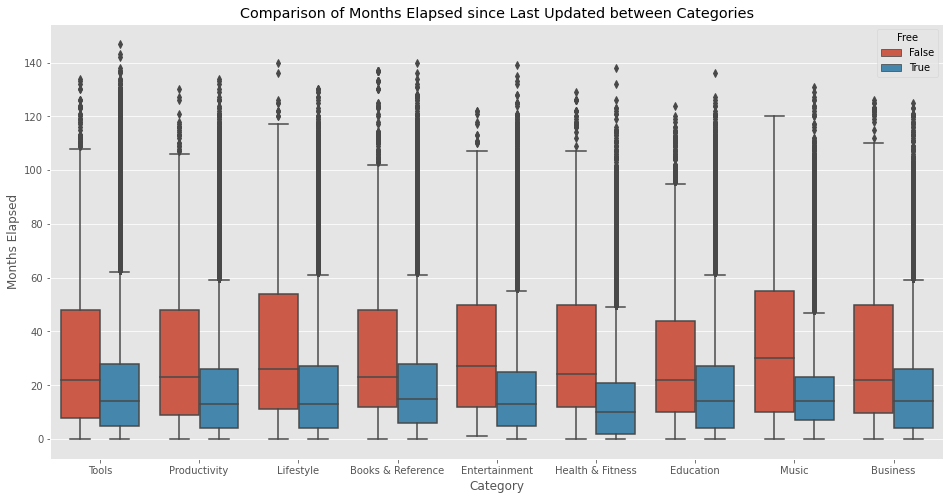

In [86]:
# Create a boxplot comparison for months elapsed across categories
fig, ax = plt.subplots(figsize= (16,8))
sns.boxplot(x='Category', y='Months Elapsed', data=top10, hue='Free', ax = ax)
ax.set (title = 'Comparison of Months Elapsed since Last Updated between Categories')

The boxplots show a very distinct difference for the months elapsed between paid and free apps across all categories. All revealed that paid apps are generally maintained less frequently than free apps.  

Let us see if install numbers are influenced by how well-maintained an app is.

C:\Users\yeosi\anaconda3\envs\baseclone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Months Elapsed vs Install No.')]

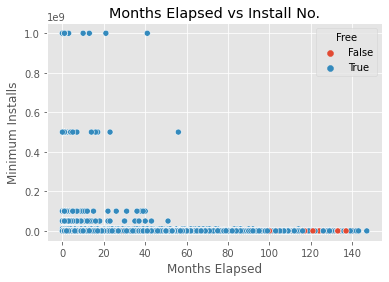

In [87]:
# Create a scatterplot for months elapsed against install numbers 
fig, ax = plt.subplots()
sns.scatterplot (top10['Months Elapsed'], top10['Minimum Installs'],hue = top10['Free'], ax= ax)
ax.set(title = 'Months Elapsed vs Install No.')

From the scatterplot, most of the apps with lesser months elapsed since last updated tend to have higher number of installs. 


Let us look at the months elapsed for successful apps with good ratings and high installs.

[Text(0.5, 1.0, 'Months Elapsed for Apps with Good Ratings and High Installs')]

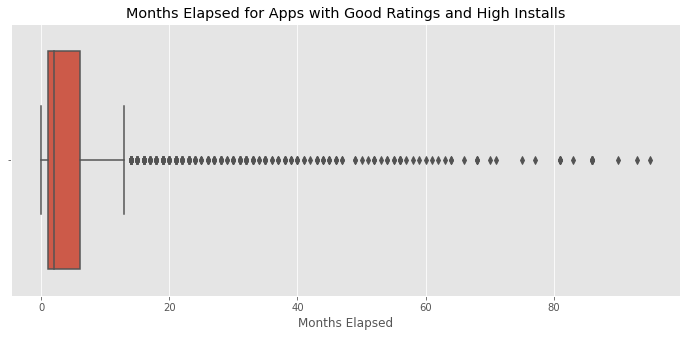

In [88]:
# Create a boxplot of the months elapsed for successful apps
fig, ax = plt.subplots(figsize = (12, 5))
sns.boxplot(x = 'Months Elapsed', data = goodratings_installs, ax= ax)
ax.set(title = 'Months Elapsed for Apps with Good Ratings and High Installs')

In [121]:
# Create the same boxplot with plotly to get the mean and median visualised in a clearer manner
trace0 = go.Box(x = goodratings_installs['Months Elapsed'], 
                name = 'Month Elapsed',
                
                boxmean = True,     # Include mean in boxplot
                marker = dict(color = 'skyblue'),
                
                line = dict(color = 'navy', 
                            width = 1) ,
               )

layout = go.Layout(autosize=True,
                       
                   title = 'Months Elapsed for Apps with Good Ratings and High Installs', 
                   title_x = 0.5
                      )         # To set the title and place the title in the center of the graph

fig = go.Figure(data=trace0, layout=layout)
plt.figure (figsize = (10,5)) # adjust figure size
offline.iplot(fig) # for figure to show in Jupyter notebook
offline.plot(fig) # to save figure as a separate file

'temp-plot.html'

<Figure size 720x360 with 0 Axes>

#### Conclusion 
Successful apps with high installs and good ratings tend to have better maintenance, the range of months elapsed for the successsful apps ( excluding outliers) is less than 13 months. These apps are updated recently within 13 months as of June 2021. Refering to the Plotly boxplot above, the median months elapsed is 2 months and mean months elapsed is around 6 months, which is pretty good. 

Apps that are well-maintained also tend to have higher number of installs. A well-maintained app will logically encourage more app users and higher installs. However, ratings do not seem to be affected by how well an app is maintained. 

Additionally, paid apps are also not as well-maintained compared to free apps. Free apps have a larger user base and thus it might be even more essential for developers to maintain their app regularly in order to keep their competitiveness. 

A point to note is that developers may also not provide the latest updates as well, thus this result may not be entirely accurate or representative. 

## 6. Content Rating

### g) What is the most popular content rating for successful applications? 

[Text(0.5, 1.0, 'Comparison of Ratings across Content Ratings')]

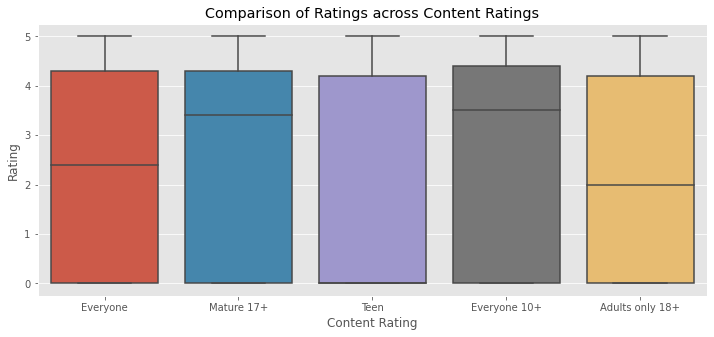

In [93]:
# Create boxplots to compare rating across categories 
fig, ax = plt.subplots(figsize = (12, 5))
sns.boxplot(x = 'Content Rating', y = 'Rating', data = top10, ax = ax)
ax.set(title= 'Comparison of Ratings across Content Ratings')

Apps rated Everyone 10+ has higher ratings in the top 10 categories.

Let us look at how the installs differ across content ratings.

[Text(0.5, 1.0, 'App Content Rating vs Install No. '),
 Text(0, 0.5, 'Average Install No.')]

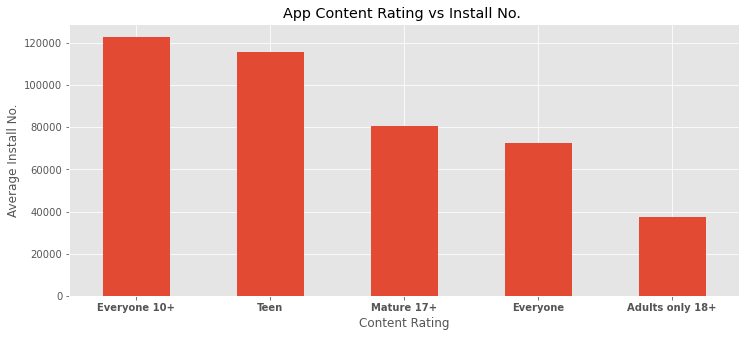

In [94]:
#Create a barplot of the average install numbers for the content ratings
fig, ax = plt.subplots(figsize = (12, 5))
ax = top10.groupby(['Content Rating'])['Minimum Installs'].mean().sort_values(ascending = False).plot(kind = 'bar', ax = ax)
plt.xticks(fontsize=10,fontweight='bold',rotation=0)
ax.set(title = 'App Content Rating vs Install No. ', ylabel = 'Average Install No.')

Apps rated Everyone 10+ also has the highest average install numbers.

Let us now look at the content rating for successful apps with good ratings and high installs.

[Text(0.5, 1.0, 'Content Rating for Apps with Good Ratings and High Installs')]

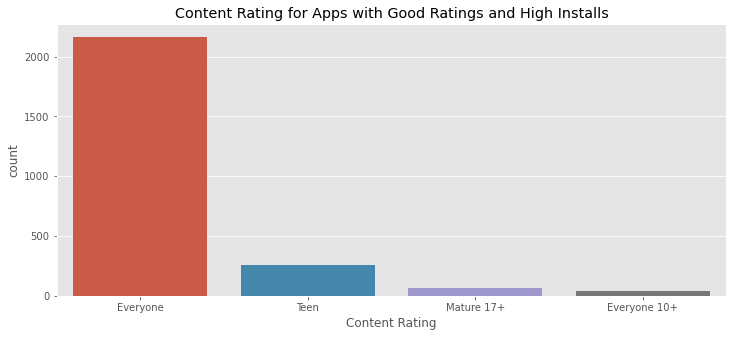

In [95]:
# Create a countplot of content ratings for successful apps
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(x = 'Content Rating', data = goodratings_installs, ax= ax)
ax.set(title = 'Content Rating for Apps with Good Ratings and High Installs')

#### Conclusion
Majority of the successful apps with high installs and good ratings tend to have content rated Everyone. 
Under the top 10 categories, apps rated 'Everyone 10+' also have higher installs and better ratings. This shows that apps that are appropriate for the general population have a larger target audience and user base, thus increasing the chance of being a successful app. 

## 7. Privacy Policy 


### h) Does having a privacy policy enhances the success of an application? 


<AxesSubplot:xlabel='Privacy Policy', ylabel='count'>

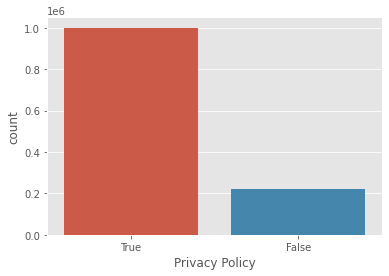

In [96]:
# create a countplot of privacy policy 
fig, ax = plt.subplots()
sns.countplot(x = 'Privacy Policy', data = top10, ax = ax)

Most apps have a privacy policy in place. 

Let us look at how app rating vary across the top 10 categories for apps with and without privacy policy.

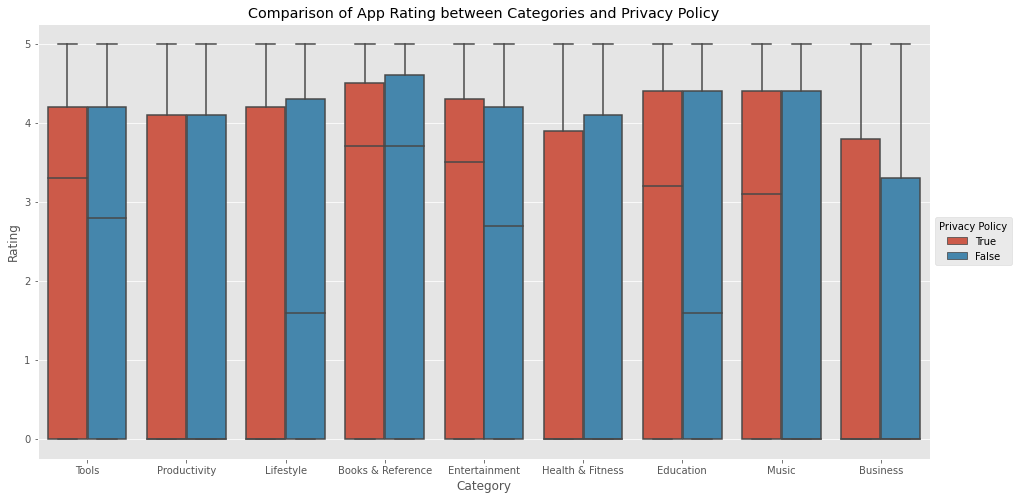

In [97]:
# Create boxplots for comparison of ratings across categories 
fig, ax = plt.subplots(figsize= (16,8))
sns.boxplot(x='Category', y='Rating', data=top10, hue='Privacy Policy', ax = ax)
ax.set (title = 'Comparison of App Rating between Categories and Privacy Policy')
ax.legend(title = 'Privacy Policy', loc='center left', bbox_to_anchor=(1, 0.5))

Apps with privacy policy have higher ratings in Tools, Entertainment, Education and Music. 

[Text(0.5, 1.0, 'App Categories with Privacy Policy')]

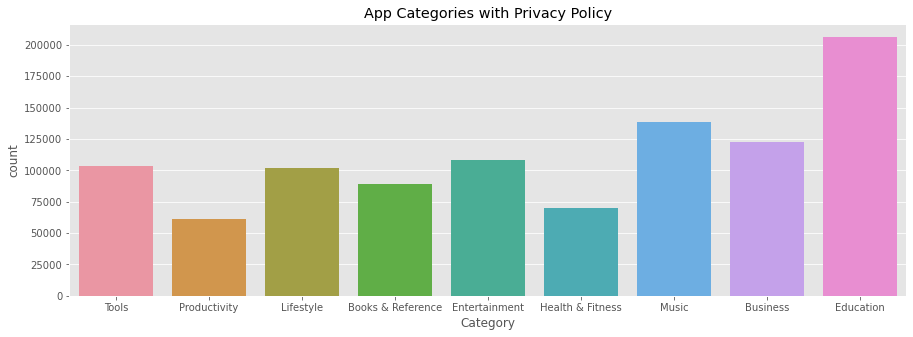

In [98]:
# Create a countplot of privacy policy across categories 
privacy_pol = top10.loc[top10['Privacy Policy']== 'True', :]
fig, ax = plt.subplots(figsize= (15,5))
sns.countplot(x = 'Category', data = privacy_pol, ax = ax)
ax.set(title = 'App Categories with Privacy Policy')

As seen from the countplot, Education has a significantly higher number of apps with privacy policy.

What about the proportion of apps with privacy policy in successful apps ?

[Text(0.5, 1.0, 'Privacy Policy for Apps with Good Ratings and High Installs')]

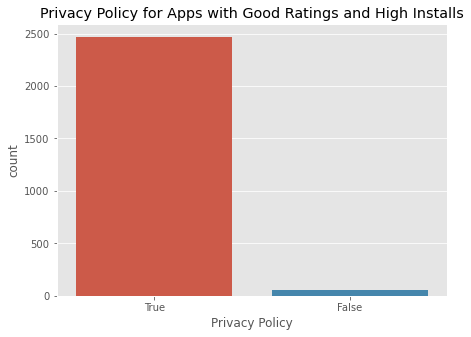

In [99]:
# Create countplot for privacy policy for successful apps
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = 'Privacy Policy', data = goodratings_installs, ax= ax)
ax.set(title = 'Privacy Policy for Apps with Good Ratings and High Installs')

Majority of the succcessful apps have a policy privacy in place. 

#### Conclusion
Having a privacy policy can have a significant impact on the ratings for categories such as Tools, Entertainment, Education and Music. Educational apps also have the highest count for privacy policies. 
In these categories, there could be higher occurences of apps which collect personal and financial information.
According to Google, an app developer needs to have a privacy policy if the app collects any form of personal information, from names to addresses to financial information. A clear privacy policy will provide an explanation to app users on what would happen to the personal information they give to the company. Therefore, having a privacy policy in place for an app would provide a sense of security and accountability for the users. This will encourage more users to download and use the app. Users will also be more willing to give a higher rating for these apps. 
This is further supported by the findings showing that successful apps with high installs and good ratings tend to have a privacy policy in place. 


## 8. Editor's Choice 

### i) How does being listed as an Editor's Choice affect the success of an applications? 

False    1220169
True         122
Name: Editors Choice, dtype: int64


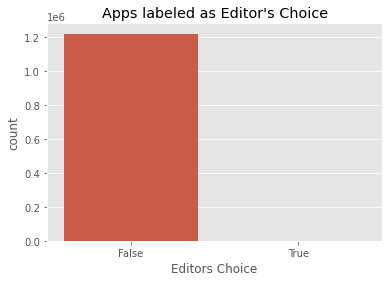

In [100]:
# Create a countplot of editor's choice in the top 10 categories  
fig, ax = plt.subplots()
sns.countplot(x= 'Editors Choice', data = top10, ax = ax)
ax.set(title = "Apps labeled as Editor's Choice")
print (top10['Editors Choice'].value_counts())

Most apps are not an editor's choice. 

Let us take a look at how ratings fare across apps with and without editor's choice. 

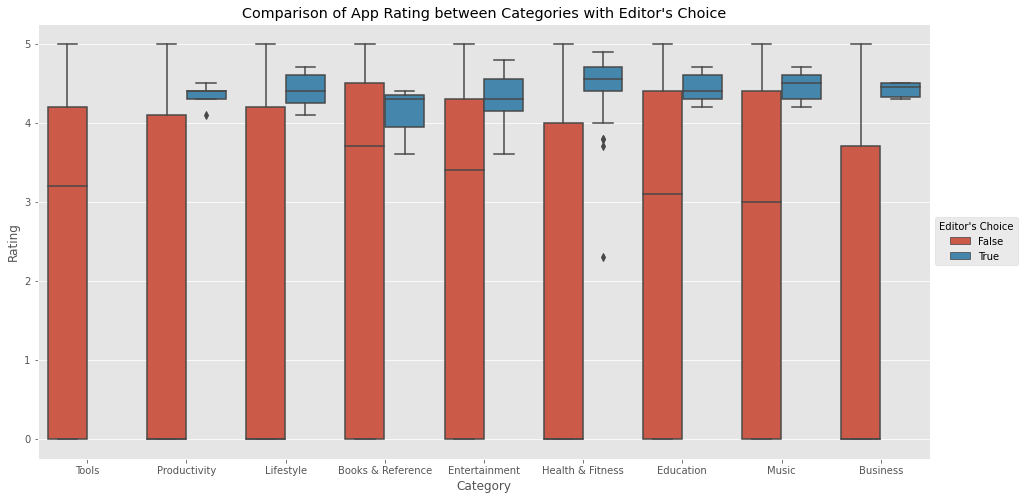

In [101]:
# Create boxplots to compare app ratings across categories with Editor's Choice
fig, ax = plt.subplots(figsize= (16,8))
sns.boxplot(x='Category', y='Rating', data=top10, hue='Editors Choice', ax = ax)
ax.set (title = "Comparison of App Rating between Categories with Editor's Choice")
ax.legend(title = "Editor's Choice", loc='center left', bbox_to_anchor=(1, 0.5))

As seen from the boxplots, apps labeled as Editor's Choice all had significantly higher ratings. This observation is applicable for all categories. 

[Text(0.5, 1.0, "Apps of Editor's Choice vs Average Install No."),
 Text(0, 0.5, 'Average Install No.')]

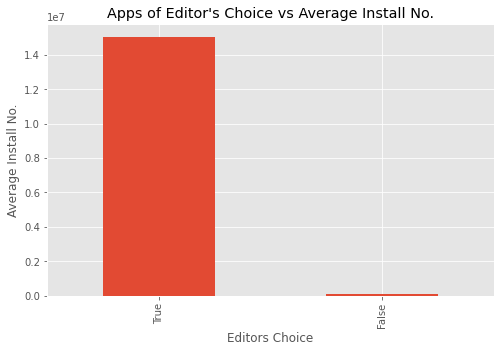

In [102]:
# Create a bar plot for install numbers against editor's choice 
fig, ax = plt.subplots(figsize= (8,5))
top10.groupby(['Editors Choice'])['Minimum Installs'].mean().sort_values(ascending = False).plot(kind= 'bar', ax = ax)
ax.set(title = "Apps of Editor's Choice vs Average Install No.", ylabel = 'Average Install No.')

Apps under Editor's Choice have a much higher installs compared to those which are not.  

#### Conclusion

Getting an app into an Editor's Choice would most likely guarantee higher installs and good ratings ( above 4.0). However, only an extremely small fraction of the apps can get into the Editor's Choice. Once again, this shows how competitive the market is. 

# 2. What is an optimal business model of a successful application?

### a) Are successful applications usually free or paid ? 
- As seen from the analysis above, free apps tend to be more successful in terms of high installs (>1 million) and good ratings (4.0 to 5.0)

### b) How do ad-supported applications and applications with in-app purchases differ in terms of ratings and installation numbers?

## 9. Ad-Supported

[Text(0.5, 1.0, 'Ad-Supported Apps')]

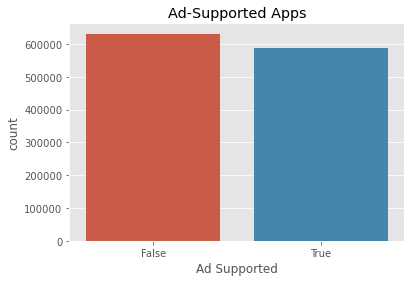

In [104]:
#Create a countplot of ad-supported apps
fig, ax = plt.subplots()
sns.countplot(x = 'Ad Supported', data = top10, ax = ax)
ax.set(title = 'Ad-Supported Apps')

Almost half of the apps in top 10 categories are ad-supported apps. 

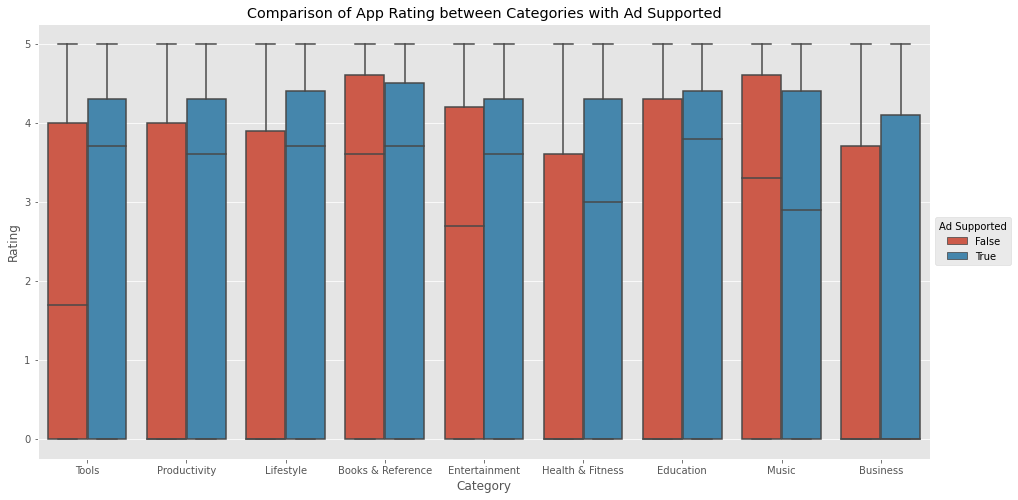

In [105]:
#Create boxplots to compare ratings across categories 
fig, ax = plt.subplots(figsize= (16,8))
sns.boxplot(x='Category', y='Rating', data=top10, hue='Ad Supported', ax = ax)
ax.set (title = 'Comparison of App Rating between Categories with Ad Supported')
ax.legend(title = "Ad Supported", loc='center left', bbox_to_anchor=(1, 0.5))

Ad-Supported apps in most categories tend to have higher ratings. 

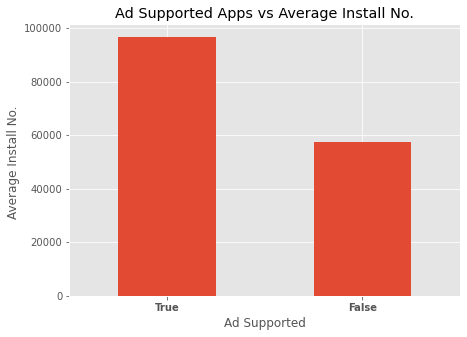

In [106]:
# Create bar plots to shows average installs for ad-supported apps
fig, ax = plt.subplots(figsize= (7,5))
top10.groupby(['Ad Supported'])['Minimum Installs'].mean().sort_values(ascending = False).plot(kind= 'bar', ax = ax)
ax.set(title = 'Ad Supported Apps vs Average Install No.', ylabel = 'Average Install No. ')
plt.xticks(fontsize=10,fontweight='bold',rotation=0);

Ad-supported apps also have higher average install numbers. 

[Text(0.5, 1.0, ' Ad-supported Apps with Good Ratings and High Installs')]

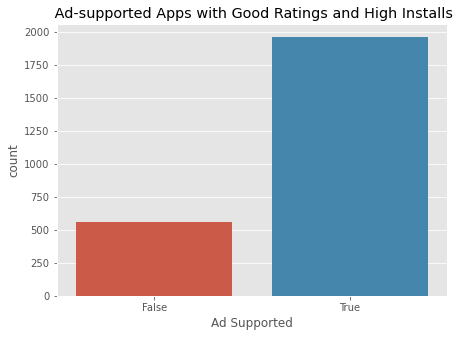

In [107]:
#Create a countplot for ad-supported apps with high installs and good ratings  
fig, ax = plt.subplots(figsize = (7, 5))
sns.countplot(x = 'Ad Supported', data = goodratings_installs, ax= ax)
ax.set(title = ' Ad-supported Apps with Good Ratings and High Installs')

A recent survey done in 2014 (https://marketingdigest.com/app-users-prefer-ad-supported-apps-over-paid-freemium-models/) showed that consumers are more likely to download apps supported by ads rather than pay for them or adapt the “freemium” model. 

Therefore, we shall check if free apps make up a large proportion of ad-supported apps which are successful.

[Text(0.5, 1.0, 'Free Ad-Supported Apps')]

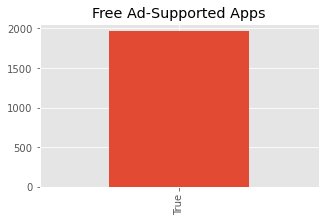

In [108]:
# Check for the proportion of free and paid for ad-supported apps and create bar graph for visualisation
fig, ax = plt.subplots(figsize = (5, 3))
goodratings_installs.loc[goodratings_installs['Ad Supported'] == True, 'Free'].value_counts().plot( kind = 'bar', ax = ax)
ax.set(title = 'Free Ad-Supported Apps')

Indeed, all of the ad-supported apps which are successful ( High installs and good ratings) are free. 

In conclusion, ad-supported apps are mostly free and they tend to have higher installs and better ratings. This is because users are more likely to download apps that are free or low-cost, but are supported by in-app ads. This may be attributed to a “try before you buy” mentality that allows users to determine if they like the apps with no monetary cost. Most free apps come with in-app ads as part of their business model. 

With a higher user base and acceptance of free ad-supported apps, there would be higher installs and better ratings compared to paid, non-ad supported apps. 

## 10. In-App Purchases 

<AxesSubplot:xlabel='In App Purchases', ylabel='count'>

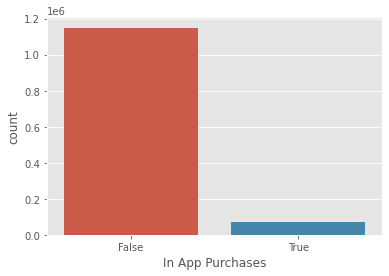

In [109]:
#Create a countplot for in-app purchases for top 10
fig, ax = plt.subplots()
sns.countplot(x = 'In App Purchases', data = top10, ax = ax)

Most of the top10 apps do not have in-app purchases. 

Let us look at how the app rating fare for app with in-app purchases.

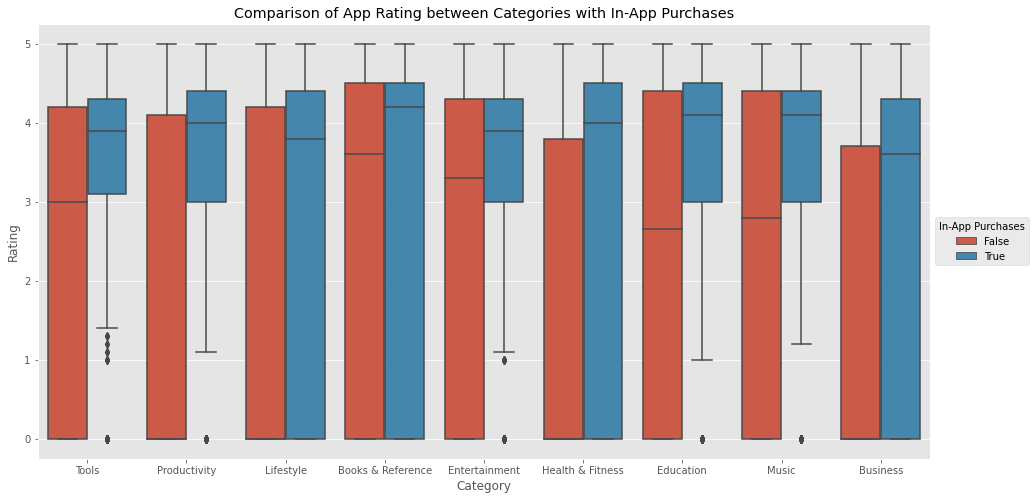

In [110]:
# Create a box plots to compare rating across categories and in -app purchases app
fig, ax = plt.subplots(figsize= (16,8))
sns.boxplot(x='Category', y='Rating', data=top10, hue='In App Purchases', ax = ax)
ax.set (title = 'Comparison of App Rating between Categories with In-App Purchases')
ax.legend(title = "In-App Purchases", loc='center left', bbox_to_anchor=(1, 0.5))

Interestingly, apps with in-app purchases have a better rating across all categories.

Let us look at the install numbers for apps with in-app purchases. 

[Text(0.5, 1.0, 'In-App Purchases vs Average Install No.'),
 Text(0, 0.5, 'Average Install No.')]

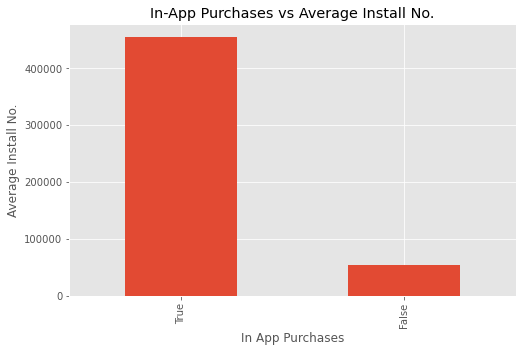

In [111]:
# Create a barplot for average install numbers for in-app purchases
fig, ax = plt.subplots(figsize= (8,5))
top10.groupby(['In App Purchases'])['Minimum Installs'].mean().sort_values(ascending = False).plot(kind= 'bar', ax = ax)
ax.set(title = 'In-App Purchases vs Average Install No.', ylabel = 'Average Install No.')

Apps with in-app purchases have higher average installs. 

[Text(0.5, 1.0, 'In - App Purchases for Apps with Good Ratings and High Installs')]

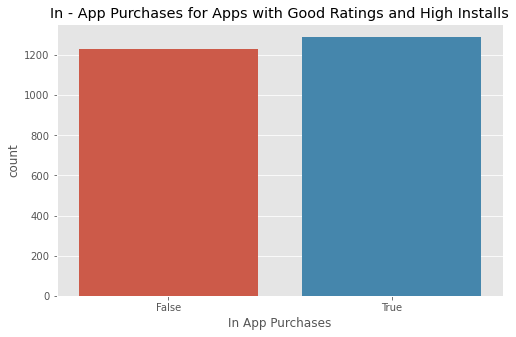

In [112]:
# Create countplot for in-app purchases in successful apps 
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = 'In App Purchases', data = goodratings_installs, ax= ax)
ax.set(title = 'In - App Purchases for Apps with Good Ratings and High Installs')

Again, for successful apps with high installs and good ratings, app with in-app purchases took up a slightly higher proportion. We shall proceed to check the proportion of free apps in successful apps with in-app purchases. 

[Text(0.5, 1.0, 'Free Apps with In-App Purchases')]

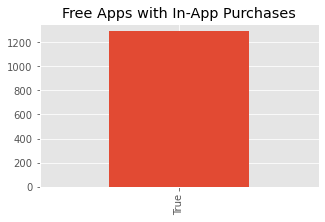

In [113]:
#Check for the proportion of free and paid for apps with in-app purchases and create bar graph for visualisation
fig, ax = plt.subplots(figsize = (5, 3))
goodratings_installs.loc[goodratings_installs['In App Purchases']== True, 'Free'].value_counts().plot(kind = 'bar', ax= ax)
ax.set(title = 'Free Apps with In-App Purchases')

All of the successful apps with in-app purchases are free. 

In conclusion, apps with in-app purchases tend to have better ratings and higher installs. These apps are also mostly free. 
According to a new Gartner survey, it reveals that mobile users are more willing to spend money on in-app features than to pay to download an app. The survey showed that users on average spend 24% more for in-app purchases than for apps themselves. Therefore, succcessful apps tend to be free and with in-app purchases. 





(https://www.businessinsider.com/users-prefer-in-app-purchases-to-new-app-sales-2016-5#:~:text=A%20new%20Gartner%20survey%20reveals,purchases%20than%20for%20apps%20themselves.)

#### Conclusion

Taking into account of the analysis made above, an optimal business model for a successful app would be to have free apps that have in-app purchases and in-app ads. This would attract more users to download the free app according to the “try before you buy” mentality, and after downloading, users would also be more inclined to spend money on in-app purchases. In-app ads are not a dealbreaker for users when they decide to use an app. Therefore, having in-app ads can be an optimal mode of monetisation other than having in-app purchases. 

# 5. Recommendation for App Development 

From the above analysis, we can gather some insights for the initial stage of an app development process. This will help to set the direction for the nature of the app that we would like to develop. To achieve the goal of an app having high installs (More than 1 million) and good rating performance ( 4.0 to 5.0), the app should ideally be:

1. Free
2. Standard app size <16 
3. Content rating for the general population (Everyone/Everyone 10+)
4. Runs on minimal android system of 4.4 /5.0 
5. Well-maintained and updated at least once every 5 months
6. Be an Editor's Choice
7. Includes a privacy policy especially for categories like Tools, Entertainment, Education and Music where collection of personal and financial information is common

App categories worth looking into: 
1. Education
2. Music
3. Books & Reference
4. Lifestyle
5. Productivity
6. Business 

These app categories tend to garner better rating performances. 

Although Tool apps are heavily used daily and tend to have high installs and rating counts, users are more critical and likely to give poor ratings when a slight lag or bug disrupt user experience. As observed from the analysis, Tool and Entertainment apps are more inclined to cause user disappointment. Therefore, Tool and Entertainment apps can be avoided unless large amount of resources can be set aside for app maintenance and app performance. 

Lastly, the optimal business model for monetization can be:
1. Free apps
2. Includes in-app purchases 
3. Includes in-app ads 

Having in-app ads is not a deal-breaker for users and they are more likely to download free apps with in-app ads and more willing to spend on in-app purchases than paid apps. 
